In [46]:
import numpy as np
import pandas as pd
import datetime
import glob
from pathlib import Path
from scipy import stats
import seaborn as sns
%matplotlib inline

In [90]:
pd.set_option('display.max_columns', None)

# 0 Import final_prep

In [47]:
#Read in csv
login = pd.read_csv('Dataset/login.csv', index_col='login')
#Convert Unix epoch to datetime
login['Reg_Datetime'] = pd.to_datetime(login['reg_date'],unit='s')
login.drop(columns='reg_date', inplace=True)

In [48]:
country_mapping = {
    'CA': 'Canada',
    'AU': 'Australia',
    'CI': "Cote D'ivoire",
    'PK': 'Pakistan',
    'AF': 'Afghanistan',
    'KE': 'Kenya',
    'MQ': 'Martinique',
    'GB': 'United Kingdom',
    'SK': 'Slovakia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'FR': 'France',
    'HR': 'Croatia',
    'PL': 'Poland',
    'ZA': 'South Africa',
    'CH': 'Switzerland',
    'NG': 'Nigeria',
    'SE': 'Sweden',
    'IE': 'Ireland',
    'ES': 'Spain',
    'MX': 'Mexico',
    'IN': 'India',
    'LT': 'Lithuania',
    'GH': 'Ghana',
    'BD': 'Bangladesh',
    'SI': 'Slovenia',
    'HK': 'Hong Kong',
    'NO': 'Norway',
    'NL': 'Netherlands',
    "Cote D'ivoire": "Cote D'ivoire",
    'DO': 'Dominican Republic',
    'PT': 'Portugal',
    'PH': 'Philippines',
    'MY': 'Malaysia',
    'SG': 'Singapore',
    'AT': 'Austria',
    'IT': 'Italy',
    'DK': 'Denmark',
    'TR': 'Turkey',
    'BR': 'Brazil',
    'MA': 'Morocco',
    'TH': 'Thailand',
    'NZ': 'New Zealand',
    'JM': 'Jamaica',
    'KW': 'Kuwait',
    'VN': 'Vietnam',
    'QA': 'Qatar',
    'PE': 'Peru',
    'AL': 'Albania',
    'BB': 'Barbados',
    'RO': 'Romania',
    'BN': 'Brunei',
    'BH': 'Bahrain',
    'U.A.E.': 'United Arab Emirates',
    'RU': 'Russia',
    'CL': 'Chile',
    'MV': 'Maldives',
    'MT': 'Malta',
    'PG': 'Papua New Guinea',
    'UZ': 'Uzbekistan',
    'BG': 'Bulgaria',
    'CO': 'Colombia',
    'LR': 'Liberia',
    'AG': 'Antigua and Barbuda',
    'ZM': 'Zambia',
    'MU': 'Mauritius',
    'AI': 'Anguilla',
    'SA': 'Saudi Arabia',
    'TZ': 'Tanzania',
    'EE': 'Estonia',
    'KR': 'South Korea',
    'KH': 'Cambodia',
    'KY': 'Cayman Islands',
    'JO': 'Jordan',
    'BT': 'Bhutan',
    'MD': 'Moldova',
    'HT': 'Haiti',
    'VC': 'Saint Vincent and The Grenadine',
    'DM': 'Dominica',
    'ME': 'Montenegro',
    'MK': 'North Macedonia',
    'MZ': 'Mozambique',
    'HU': 'Hungary',
    'MN': 'Mongolia',
    'IS': 'Iceland',
    'AR': 'Argentina',
    'EC': 'Ecuador',
    'GU': 'Guam',
    'AW': 'Aruba',
    'PF': 'French Polynesia',
    'LS': 'Lesotho',
    'LU': 'Luxembourg',
    'KN': 'Saint Kitts and Nevis',
    'SX': 'Netherlands',
    'Sint Maarten (Dutch part)' : 'Netherlands',
    'VI': 'Virgin Islands (U.S.)',
    'PY': 'Paraguay',
    'FJ': 'Fiji',
    'GD': 'Grenada',
    'GY': 'Guyana',
    'MF': 'France',
    'TW': 'Taiwan',
    'MW': 'Malawi',
    'GF': 'French Guiana',
    'BJ': 'Benin',
    'GP': 'Guadeloupe',
    'TC': 'Turks and Caicos Islands',
    'BZ': 'Belize',
    'SV': 'El Salvador',
    'BO': 'Bolivia',
    'SN': 'Senegal',
    'GN': 'Guinea',
    'CR': 'Costa Rica',
    'ML': 'Mali',
    'BM': 'Bermuda',
    'BQ': 'Bonaire, Sint Eustatius and Saba',
    'AD': 'Andorra',
    'OM': 'Oman',
    'PM': 'Saint Pierre and Miquelon',
    'RE': 'Reunion',
    'LC': 'Saint Lucia',
    'NC': 'New Caledonia',
    'Kosovo': 'Kosovo',
    'Japan': 'Japan',
    'China': 'China',
    'Venezuela': 'Venezuela',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'United+Kingdom': 'United Kingdom',
    'Hong+Kong': 'Hong Kong',
    'South+Africa': 'South Africa',
    'Puerto Rico': 'Puerto Rico',
    'Sao Tome and Principe': 'Sao Tome and Principe',
    'French Polynesi': 'French Polynesia',
    'United Arab Emi': 'United Arab Emirates',
    'Hong Kong S.A.R.': 'Hong Kong',
    'Runion--trunc': 'Reunion',
    'Virgin Islands': 'Virgin Islands (U.S.)',
    'Iran': 'Iran',
    'Bosnia and Herz': 'Bosnia and Herzegovina',
    'Saint Vincent a': 'Saint Vincent and The Grenadine',
    'Papua New Guine': 'Papua New Guinea',
    'Myanmar': 'Myanmar',
    'Zimbabwe': 'Zimbabwe',
    'Sierra Leone': 'Sierra Leone',
    'Syria': 'Syria',
    'Trinidad and To': 'Trinidad and Tobago',
    'Palestine': 'Palestine',
    'Burundi': 'Burundi',
    'Laos': 'Laos',
    'Dominican Repub': 'Dominican Republic',
    'United States M': 'United States',
    'Antigua and Bar': 'Antigua and Barbuda',
    'Palau': 'Palau',
    'Djibouti': 'Djibouti',
    'Curaçao': 'Curacao',
    'Swaziland': 'Eswatini',
    'Palestinian Authority': 'Palestine',
    'Mauritania': 'Mauritania',
    'Monaco': 'Monaco',
    'Åland Islands': 'Aland Islands',
    'Gibraltar': 'Gibraltar',
    'Armenia': 'Armenia',
    'Seychelles': 'Seychelles',
    'Paraguay': 'Paraguay',
    'Equatorial Guin': 'Equatorial Guinea',
    'Kyrgyzstan': 'Kyrgyzstan',
    'Faroe Islands': 'Faroe Islands',
    'Antarctica': 'Antarctica',
    'United States': 'United States',
    'Wallis and Futu': 'Wallis and Futuna',
    'Eritrea': 'Eritrea',
    'Turks and Caico': 'Turks and Caicos Islands',
    'land Islands--trunc': 'Aland Islands',  # Truncated, assuming Åland Islands
    'Congo (Republic': 'Republic of the Congo',
    'Chad': 'Chad',
    'Samoa': 'Samoa',
    'Sao Tome and Pr': 'Sao Tome and Principe',
    'Tonga': 'Tonga',
    'Tahiti': 'French Polynesia',  # Assuming Tahiti is part of French Polynesia
    'Åland Islands': 'Aland Islands',
    'Nauru': 'Nauru',
    'Taiwan': 'Taiwan',
    'Solomon Islands': 'Solomon Islands',
    'Comoros': 'Comoros',
    'NigeriaHouse no 3 Pre': 'Nigeria',  # Unclear data, assuming Nigeria
    'Tajikistan': 'Tajikistan',
    'Nicaragua': 'Nicaragua',
    'Curaçao': 'Curacao',
    'Kiribati': 'Kiribati',
    'Saint Martin (F': 'Saint Martin',
    'Bonaire, Sint E': 'Bonaire, Sint Eustatius and Saba',
    'Saint Kitts and': 'Saint Kitts and Nevis',  # Incomplete entry, assuming Nevis
    'South Georgia a': 'South Georgia and The South Sandwich Islands',  # Incomplete entry, assuming South Sandwich Islands
    'British Indian': 'British Indian Ocean Territory',
    'Guernsey': 'Guernsey',
    'Liechtenstein': 'Liechtenstein',
    'Greenland': 'Greenland',
    'French Southern': 'France',
    'YT' : 'France',
    'Korea': 'South Korea',  # Assuming South Korea
    'BS': 'The Bahamas',
    'ID': 'Indonesia',
    'RÃ©union': 'Réunion',  # Assuming Réunion
    'AE': 'United Arab Emirates',
    'CN' : 'China',
    'BW' : 'Botswana',
    'CANADA' : 'Canada',
    'CM' : 'Cameroon',
    'Congo (Republic)' : 'Republic of the Congo',
    'CuraÃ§ao' : 'Curacao',  #Assuming Curacao
    'DZ' : 'Algeria',
    'FI' : 'Finland',
    'GR' : 'Greece',
    'KG' : 'Kyrgyzstan',
    'KZ' : 'Kazakhstan',
    'Korea, South' : 'South Korea',
    'LK' : 'Sri Lanka',
    'LV' : 'Latvia',
    'SZ' : 'Eswatini',
    'Saint Helena, Ascension and Tri' : 'Saint Helena, Ascension and Tristan da Cunha',
    'TN' : 'Tunisia',
    'TT' : 'Trinidad and Tobago',
    'Taiwan, China' : 'Taiwan',
    'UG' : 'Uganda',
    'UK' : 'United Kingdom',
    'land Islands' : 'Aland Islands',   #Assuming Åland Islands
    'Ã…land Islands' : 'Aland Islands',  #Assuming Åland Islands
    'Aland Islands' : 'Aland Islands'
}
#Country mapping
login['country'] = login['country'].replace(country_mapping)

In [49]:
# Symbol: Read in csv
symbol = pd.read_csv('Dataset/symbol.csv', index_col='symbol')

# Reason: Read in csv
reason = pd.read_csv('Dataset/reason.csv', index_col='code')
#Group insignificant reasons under 'Other'
imp_reason = ['Client', 'Expert', 'Mobile']
reason['reason'] = reason['reason'].apply(lambda x: x if x in imp_reason else 'Other')

In [50]:
# Daily Chart: Read in csv
daily_charts = glob.glob("Dataset/daily_chart/*.csv")
all_charts = pd.DataFrame()
for chart in daily_charts:
    name = Path(chart).stem
    csv = pd.read_csv(chart, index_col='date', parse_dates=True)
    all_charts[name] = csv['close']
#Create chart for conversion to USD
usd_columns = [col for col in all_charts.columns if col.startswith('USD')]
all_charts_USD = all_charts.copy()
all_charts_USD[usd_columns] = 1 / all_charts_USD[usd_columns]
all_charts_USD.columns = [col.replace('USD', '') for col in all_charts_USD.columns]
all_charts_USD['USD'] = float(1)

In [51]:
# Trades: Read in csv
trades = pd.read_csv('Dataset/trades.csv', index_col='ticket')
#Convert open and close from Unix Epoch to datetime
trades['Open_Datetime'] = pd.to_datetime(trades['open_time'],unit='s')
trades['Close_Datetime'] = pd.to_datetime(trades['close_time'],unit='s')
trades['Trade_Duration'] = trades['Close_Datetime'] - trades['Open_Datetime']
trades.drop(columns=['open_time', 'close_time'], inplace=True)
#Convert reason
trades['Reason'] = reason.loc[trades['reason'], 'reason'].values
trades.drop(columns='reason', inplace=True)
#Add symbol types
trades = trades.join(symbol['type'], on='symbol')

In [52]:
#Add account currency and trade date (open)
trades_USD = trades.join(login['account_currency'], on='login')
trades_USD['Trade_Date'] = pd.to_datetime(pd.to_datetime(trades_USD['Open_Datetime']).dt.date)
#Add relevant conversion rate
trades_USD = pd.merge(trades_USD, all_charts_USD.stack().rename('usd_rate'), how='left', left_on=['Trade_Date', 'account_currency'], right_index=True)
#Convert non-USD columns to USD
trades_conversions = ['commission', 'swaps', 'profit']
for column in trades_conversions:
    trades_USD[column] = trades_USD [column] * trades_USD['usd_rate']
trades_USD.drop(columns=['account_currency', 'Trade_Date', 'usd_rate'], inplace=True)

In [53]:
# Daily Report: Read in csv
report = pd.read_csv('Dataset/daily_report.csv')
#Convert record time to datetime
report['record_time'] = pd.to_datetime(report['record_time'])
#Add account currency
report_USD = report.join(login['account_currency'], on='login')
#Add relevant conversion rate
all_charts_USD_backfill = pd.merge(report_USD['record_time'], all_charts_USD.reset_index(), how='left', left_on='record_time', right_on='date').fillna(method='bfill').drop(columns='date').rename(columns={'record_time':'date'}).set_index('date')
all_charts_USD_backfill = all_charts_USD_backfill.groupby(level=0).first().stack()
report_USD = pd.merge(report_USD, all_charts_USD_backfill.rename('usd_rate'), how='left', left_on=['record_time', 'account_currency'], right_index=True)
#Convert non-USD columns to USD
report_conversions = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin']
for column in report_conversions:
    report_USD[column] = report_USD [column] * report_USD['usd_rate']
report_USD.drop(columns=['account_currency', 'usd_rate'], inplace=True)

In [293]:
report_USD

,login,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
0,457547,2023-01-01,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,474589,2023-01-01,0.0,0.409938,0.409938,0.0,0.0,0.0,0.0
2,504321,2023-01-01,0.0,1.486026,1.486026,0.0,0.0,0.0,0.0
3,504322,2023-01-01,0.0,0.510000,0.510000,0.0,0.0,0.0,0.0
4,504326,2023-01-01,0.0,0.010000,0.010000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8753021,1000055123,2024-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753022,1000055441,2024-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753023,1000055515,2024-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8753024,1000059485,2024-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merged Datasets (> 2023-01-01)

In [54]:
login_2023 = login[login['Reg_Datetime'] >= '2023-01-01']
login_2023.sort_values('Reg_Datetime')

,country,account_currency,Reg_Datetime
login,,,
88944135,France,EUR,2023-01-01 00:04:13
88944138,Singapore,USD,2023-01-01 04:15:15
88944152,Nigeria,USD,2023-01-01 14:52:14
88944153,Germany,EUR,2023-01-01 14:56:28
88944161,France,EUR,2023-01-01 18:42:26
...,...,...,...
524987,Malaysia,USD,2024-03-01 07:39:18
524988,Malaysia,USD,2024-03-01 07:40:03
524989,Malaysia,USD,2024-03-01 07:40:51


In [55]:
login_trades = pd.merge(login_2023, trades_USD.reset_index(), how='inner', on='login').set_index(['login'])
login_trades

,country,account_currency,Reg_Datetime,ticket,symbol,cmd,volume,open_price,close_price,tp,sl,commission,swaps,profit,Open_Datetime,Close_Datetime,Trade_Duration,Reason,type
login,,,,,,,,,,,,,,,,,,,
524974,Switzerland,USD,2023-05-17 03:13:02,68288434,XAUUSD,1,0.07,2025.48000,2025.41000,2015.59,2025.31,0.00,0.0,0.49,2024-01-29 08:00:00,2024-01-29 08:05:37,0 days 00:05:37,Expert,Metal
524974,Switzerland,USD,2023-05-17 03:13:02,60331067,XAUUSD,0,0.03,1976.19000,1976.66000,1986.11,1976.70,0.00,0.0,1.41,2023-06-01 22:00:00,2023-06-01 22:05:38,0 days 00:05:38,Expert,Metal
524974,Switzerland,USD,2023-05-17 03:13:02,68303022,XAUUSD,1,0.07,2036.84000,2036.47000,1996.87,2036.42,0.00,0.0,2.59,2024-01-29 16:00:00,2024-01-29 16:02:05,0 days 00:02:05,Expert,Metal
524974,Switzerland,USD,2023-05-17 03:13:02,68455282,XAUUSD,0,0.07,2054.51000,2054.89000,2064.35,2054.99,0.00,0.0,2.66,2024-02-01 20:00:00,2024-02-01 20:01:07,0 days 00:01:07,Expert,Metal
524974,Switzerland,USD,2023-05-17 03:13:02,68358126,XAUUSD,0,0.07,2036.24000,2036.32000,2046.10,2036.32,0.00,0.0,0.56,2024-01-30 22:00:00,2024-01-30 22:34:54,0 days 00:34:54,Expert,Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000055123,Canada,USD,2023-11-07 08:04:15,66572516,EURUSD,0,0.04,1.08538,1.08551,0.00,0.00,-0.28,0.0,0.52,2023-11-17 06:26:00,2023-11-17 07:59:02,0 days 01:33:02,Expert,Forex
1000055123,Canada,USD,2023-11-07 08:04:15,66578119,GBPCAD,0,0.10,1.70418,1.70528,0.00,0.00,-0.70,0.0,8.01,2023-11-17 11:30:00,2023-11-17 11:44:42,0 days 00:14:42,Expert,Forex
1000055123,Canada,USD,2023-11-07 08:04:15,66579582,EURUSD,1,0.14,1.08667,1.08579,0.00,0.00,-0.98,0.0,12.32,2023-11-17 12:23:00,2023-11-17 14:21:59,0 days 01:58:59,Expert,Forex


In [69]:
login_report = pd.merge(login_2023, report_USD, how='inner', on='login').set_index(['login'])
login_report = login_trades['ticket'].groupby('login').count().to_frame().join(login_report).drop(columns='ticket')
login_report

,country,account_currency,Reg_Datetime,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
login,,,,,,,,,,,
524974,Switzerland,USD,2023-05-17 03:13:02,2023-05-17,200.0,200.00,200.00,0.0,0.00,0.00,0.00
524974,Switzerland,USD,2023-05-17 03:13:02,2023-05-18,0.0,200.00,200.00,0.0,0.00,0.00,0.00
524974,Switzerland,USD,2023-05-17 03:13:02,2023-05-19,0.0,203.21,203.21,0.0,3.21,0.00,0.00
524974,Switzerland,USD,2023-05-17 03:13:02,2023-05-20,0.0,203.21,203.21,0.0,0.00,0.00,0.00
524974,Switzerland,USD,2023-05-17 03:13:02,2023-05-21,0.0,203.21,203.21,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
1000055123,Canada,USD,2023-11-07 08:04:15,2024-02-27,0.0,37643.18,37643.18,0.0,0.00,0.00,0.00
1000055123,Canada,USD,2023-11-07 08:04:15,2024-02-29,0.0,37521.00,36507.56,0.0,-122.18,-1013.44,818.92
1000055123,Canada,USD,2023-11-07 08:04:15,2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Importing the Dataset and remove outlier

In [70]:
# Read the CSV file into a DataFrame
dataset = pd.read_csv("Dataset/output_dataset.csv")
# dataset.drop(['longevity_bin'], axis = 1, inplace =  True)
dataset

,login,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,...,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,Trading_Method,active,longevity,longevity_bin
0,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,...,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2
1,524979,France,USD,20.504673,0.496354,0.013943,6.724644e+03,-264.410462,4,17,...,-0.549598,0.000000,-0.111285,-0.837867,7.316443,0.0,Mobile,False,107,2
2,760487,Singapore,SGD,5.307692,0.159420,0.012609,2.783882e+03,-3403.656636,1,17,...,0.000000,0.000000,0.002172,-10.232797,2.648954,0.0,Expert,False,13,0
3,804664,Malaysia,USD,9.444444,0.635294,0.018706,5.490400e+03,17.604088,6,3,...,0.000000,0.000000,-0.023176,-0.524588,0.332571,0.0,Mobile,False,9,0
4,804687,Australia,AUD,1.301075,0.512397,0.019773,5.271755e+05,-45.416080,17,3,...,55.989328,-0.101129,-0.009749,-0.210692,2.947076,0.0,Mobile,False,372,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,88944953,Canada,CAD,0.141732,0.370370,0.041667,1.621176e+07,-24.464597,8,8,...,0.000000,0.000000,-0.005931,-0.134167,0.178571,0.0,Mobile,True,381,5
5721,88944971,Malaysia,USD,4.420000,0.461538,1.389367,1.249156e+09,-298.590702,14,23,...,0.195671,0.000000,-5.085113,-51.760588,1.773400,0.0,Expert,False,100,2
5722,88945034,Singapore,USD,10.413043,0.400835,0.043278,1.522641e+07,-70.501778,25,15,...,0.623201,-0.256347,-0.000271,-1.519937,0.000000,0.0,Expert,False,46,1
5723,88945038,Singapore,SGD,5.162055,0.588055,0.078913,1.824879e+04,140.220508,8,17,...,0.225533,-0.700736,-0.125105,-0.125379,0.000000,0.0,Expert,False,253,3


In [71]:
# Retrieving the outlier
dataset_outlier = dataset[dataset['login'] == 88944670]
# Removing the outlier
dataset = dataset[dataset['login'] != 88944670]

In [72]:
dataset.describe()

,login,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,Profit_Loss_Variability,Average_Trade_Duration,TP/SL Hit Ratio,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,longevity,longevity_bin
count,5.724000e+03,5724.000000,5724.000000,5724.000000,5.724000e+03,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5.724000e+03,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.000000,5724.00000,5724.000000
mean,4.245265e+06,24.681286,0.445949,0.383507,2.283956e+08,-145.618864,5.699860,13.521838,0.472558,150.156950,6.626593e+04,1.763360,1.713727,-0.410951,0.184866,-11.225060,15.517422,57.027385,45.18833,0.631202
std,1.650926e+07,711.010189,0.280847,1.606836,1.838842e+09,3692.576053,6.882128,4.690011,0.283233,1529.537767,2.094791e+05,27.807085,223.541269,3.629838,31.933647,712.989776,98.640634,242.780465,69.93953,1.010729
min,5.249780e+05,0.010178,0.000000,0.005000,1.040000e+00,-109247.458671,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-8311.305640,-108.598893,-1173.062580,-38585.491238,-707.854174,0.000000,0.00000,0.000000
25%,8.148128e+05,1.000000,0.263926,0.028333,2.612728e+04,-467.488782,1.000000,10.000000,0.285714,5.781460,4.440794e+03,0.000000,0.000000,0.000000,-0.060267,-16.594074,0.307664,0.000000,2.00000,0.000000
50%,8.215825e+05,2.488056,0.466439,0.078333,3.660047e+05,-71.920440,3.000000,15.000000,0.500000,23.971609,1.569773e+04,0.000000,0.000000,0.000000,0.000000,-1.782089,2.599838,0.000000,15.00000,0.000000
75%,7.056822e+06,7.000000,0.600000,0.269745,2.196861e+07,44.644378,7.000000,17.000000,0.666667,83.208158,5.836709e+04,0.090909,0.197230,0.000000,0.000487,0.220208,8.541644,2.000000,60.00000,1.000000
max,1.000055e+09,46509.000000,1.000000,39.285714,6.827463e+10,112017.955519,65.000000,23.000000,1.000000,87148.616792,6.793694e+06,1245.000000,9557.708333,0.000000,1045.468282,15005.000000,3721.574881,8000.000000,415.00000,5.000000


## Merge the dataset to login_report and login_trade
-> The daily report and trade data of the customer that login after 2023 and actual make a trade

In [73]:
dataset_trades_USD_active = pd.merge(dataset, trades_USD, how='inner', on='login').set_index(['login'])
dataset_trades_USD_active

,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,...,tp,sl,commission,swaps,profit,Open_Datetime,Close_Datetime,Trade_Duration,Reason,type
login,,,,,,,,,,,,,,,,,,,,,
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,1975.0,0.00,0.0,0.0,346.850388,2023-07-19 10:16:46,2023-07-19 10:50:34,0 days 00:33:48,Expert,Metal
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,0.0,0.00,0.0,0.0,20.568414,2023-07-18 20:24:03,2023-07-18 20:24:51,0 days 00:00:48,Expert,Index
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,1970.0,0.00,0.0,0.0,408.755973,2023-07-19 08:18:24,2023-07-19 09:44:04,0 days 01:25:40,Expert,Metal
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,1967.0,0.00,0.0,0.0,258.623820,2023-07-21 11:57:56,2023-07-21 12:05:18,0 days 00:07:22,Expert,Metal
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,1968.0,1961.40,0.0,0.0,973.507240,2023-07-25 13:44:56,2023-07-25 15:02:04,0 days 01:17:08,Expert,Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,...,0.0,0.00,0.0,0.0,1.440000,2023-12-15 15:39:07,2023-12-15 15:39:16,0 days 00:00:09,Expert,Metal
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,...,0.0,0.00,0.0,0.0,-1.680000,2023-10-24 18:55:16,2023-10-24 18:57:46,0 days 00:02:30,Expert,Metal
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,...,0.0,2025.95,0.0,0.0,0.280000,2023-12-06 22:41:30,2023-12-06 22:42:23,0 days 00:00:53,Expert,Metal


In [74]:
dataset_report_USD_active = pd.merge(dataset, report_USD, how='inner', on='login').set_index(['login'])
dataset_report_USD_active

,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,...,longevity,longevity_bin,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
login,,,,,,,,,,,,,,,,,,,,,
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,142,2,2023-06-07,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,142,2,2023-06-08,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,142,2,2023-06-09,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,142,2,2023-06-10,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,...,142,2,2023-06-11,107.565,107.565,107.565,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,...,85,1,2024-02-27,0.000,0.740,0.740,0.0,0.0,0.0,0.0
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,...,85,1,2024-02-29,0.000,0.740,0.740,0.0,0.0,0.0,0.0
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,...,85,1,2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Primiary Analysis on dataset

## 2.0 Final_Prep_Testing

### 2.01 Trading Strategies

In [75]:
def login_activity_analysis(lt_df):
    #Calculate time between:
    # - first trade open and last trade close
    # - registration date and first trade open
    earliest_trades_opened = lt_df['Open_Datetime'].groupby(level=0).min()
    latest_trades_closed = lt_df['Close_Datetime'].groupby(level=0).max()
    login_activity_df = earliest_trades_opened.to_frame().join(latest_trades_closed, how='inner')
    login_activity_df = login_activity_df.join(login['Reg_Datetime'], how='inner')
    login_activity_df['Longevity'] = login_activity_df['Close_Datetime'] - login_activity_df['Open_Datetime']
    login_activity_df['Reg_First_Gap'] = login_activity_df['Open_Datetime'] - login_activity_df['Reg_Datetime']
    #Bin longevity for classification
    bins = [-1, 30, 90, 180, 270, 360, float('inf')]
    login_activity_df['Longevity_Bin'] = pd.cut(login_activity_df['Longevity'].dt.days, bins=bins, labels=False)
    #Add total and average trades per day over trading period
    login_activity_df['Total_Trades'] = lt_df.groupby('login').count()['ticket']
    login_activity_df['Avg_Daily_Trades'] = login_activity_df['Total_Trades'] / login_activity_df['Longevity'].dt.days
    login_activity_df.drop(inplace=True, columns=['Open_Datetime', 'Close_Datetime', 'Reg_Datetime'])
    return login_activity_df
login_activity = login_activity_analysis(login_trades)
login_activity

,Longevity,Reg_First_Gap,Longevity_Bin,Total_Trades,Avg_Daily_Trades
login,,,,,
524974,287 days 04:01:53,2 days 02:47:11,4,145,0.505226
524978,142 days 22:58:19,34 days 15:57:56,2,1392,9.802817
524979,107 days 15:38:33,9 days 10:46:45,2,2194,20.504673
524984,111 days 19:52:45,13 days 00:20:48,2,247,2.225225
760487,13 days 04:20:34,1 days 08:02:32,0,69,5.307692
...,...,...,...,...,...
88945036,270 days 16:46:10,37 days 06:42:43,3,3581,13.262963
88945038,253 days 08:21:26,12 days 17:19:41,3,1306,5.162055
1000054825,150 days 12:56:38,7 days 20:43:22,2,850,5.666667


### 2.02 Types of assets traded

In [76]:
def trade_types_analysis(lt_df):
    #Add sum of each asset types traded and total trades.
    trade_types_df = lt_df.groupby(['login', 'type']).count()['ticket'].unstack(fill_value=0)
    trade_types_df = trade_types_df.join(lt_df['ticket'].groupby('login').count()).rename(columns={'ticket' : 'Total'})
    #Add percentage of all trades made per asset.
    asset_types = ['Commodity', 'Crypto', 'Forex', 'Index', 'Metal', 'Oil']
    for type in asset_types:
        trade_types_df[type + '_%'] = trade_types_df[type] / trade_types_df['Total']
    #Add types traded.
    trade_types_df['Types_Traded'] = lt_df.groupby(['login', 'type']).count().groupby(['login']).count()['ticket']
    return trade_types_df[['Commodity_%', 'Crypto_%', 'Forex_%', 'Index_%', 'Metal_%', 'Oil_%', 'Types_Traded']]
trade_types = trade_types_analysis(login_trades)
trade_types

,Commodity_%,Crypto_%,Forex_%,Index_%,Metal_%,Oil_%,Types_Traded
login,,,,,,,
524974,0.0,0.0,0.000000,0.000000,1.000000,0.0,1
524978,0.0,0.0,0.750718,0.000718,0.248563,0.0,3
524979,0.0,0.0,0.000000,0.801732,0.198268,0.0,2
524984,0.0,0.0,0.141700,0.000000,0.858300,0.0,2
760487,0.0,0.0,0.000000,1.000000,0.000000,0.0,1
...,...,...,...,...,...,...,...
88945036,0.0,0.0,1.000000,0.000000,0.000000,0.0,1
88945038,0.0,0.0,1.000000,0.000000,0.000000,0.0,1
1000054825,0.0,0.0,0.157647,0.761176,0.081176,0.0,3


### 2.03 Volume traded

In [80]:
# def trade_type_volume_analysis(lt_df):
#     trade_volume = lt_df[['cmd', 'volume_usd', 'Reason', 'type']].copy()
#     #Separate amounts into bought and sold (based on notional values)
#     trade_volume['Buy_Volume'] = trade_volume['volume_usd'].where(trade_volume['cmd'] == 0)
#     trade_volume['Sell_Volume'] = trade_volume['volume_usd'].where(trade_volume['cmd'] == 1)
#     #Add sums for all volumes (Total, Bought, and Sold)
#     total_trade_volume = trade_volume.groupby('login').sum(numeric_only=True).drop(columns=['cmd'])
#     total_trade_volume['type'] = 'Total'
#     total_trade_volume = total_trade_volume.reset_index().set_index(['login', 'type']).unstack()
#     trade_volume = trade_volume.groupby(['login', 'type']).sum(numeric_only=True).drop(columns=['cmd']).unstack().join(total_trade_volume).stack().unstack(1, fill_value=0)
#     #Calculate % of trades compared to total volumes
#     volumes = ['volume_usd', 'Buy_Volume', 'Sell_Volume']
#     asset_types = ['Commodity', 'Crypto', 'Forex', 'Index', 'Metal', 'Oil']
#     trade_volume_perc = trade_volume.copy()
#     for vol in volumes:
#         for type in asset_types:
#             trade_volume_perc[(vol, type)] = trade_volume[(vol, type)]/trade_volume[(vol, 'Total')]
#         trade_volume_perc[(vol, 'Total')] = trade_volume[(vol, 'Total')] / trade_volume[('volume_usd', 'Total')]
#     #Combine totals and %
#     trade_volume_combined = trade_volume_perc.join(trade_volume, lsuffix='_%')
#     trade_volume_combined#.droplevel(0, axis=1)
#     #Remove column level (by combining level names)
#     trade_volume_perc_1_level = trade_volume_combined.index.to_frame()
#     all_types = ['Commodity', 'Crypto', 'Forex', 'Index', 'Metal', 'Oil', 'Total']
#     for vol in volumes:
#         for type in all_types:
#             trade_volume_perc_1_level[type + '_' + vol] = trade_volume_perc[(vol, type)]
#     trade_volume_perc_1_level.drop(columns=['login'], inplace=True)
#     return trade_volume_perc_1_level
# trade_type_volume = trade_type_volume_analysis(login_trades)
# trade_type_volume

### 2.04 Trading methods

In [81]:
def trade_method_analysis(lt_df):
    #Add sum of each trading method used and total trades.
    trade_methods_df = lt_df.groupby(['login', 'Reason']).count()['ticket'].unstack(fill_value=0)
    trade_methods_df = trade_methods_df.join(lt_df['ticket'].groupby('login').count()).rename(columns={'ticket' : 'Total'})
    #Add percentage of all trades made per method.
    reason_types = ['Client', 'Expert', 'Mobile', 'Other']
    for type in reason_types:
        trade_methods_df[type + '_%'] = trade_methods_df[type] / trade_methods_df['Total']
    #Add methods used to make trades.
    trade_methods_df['Methods_Used'] = lt_df.groupby(['login', 'Reason']).count().groupby(['login']).count()['ticket']
    return trade_methods_df.drop(columns=reason_types).drop(columns='Total')
trade_methods = trade_method_analysis(login_trades)
trade_methods

,Client_%,Expert_%,Mobile_%,Other_%,Methods_Used
login,,,,,
524974,0.000000,1.000000,0.000000,0.0,1
524978,0.000000,1.000000,0.000000,0.0,1
524979,0.000000,0.000000,1.000000,0.0,1
524984,0.000000,1.000000,0.000000,0.0,1
760487,0.188406,0.811594,0.000000,0.0,2
...,...,...,...,...,...
88945036,0.000000,0.999721,0.000279,0.0,2
88945038,0.000000,1.000000,0.000000,0.0,1
1000054825,0.028235,0.000000,0.971765,0.0,2


### 2.05 Account activity

In [82]:
def account_change_prep(lr_df, lt_df):
    account_change = lt_df['Open_Datetime'].groupby('login').min().to_frame().join(lr_df.reset_index().set_index(['login', 'record_time']).sort_index(axis=0, level=['login', 'record_time']).drop(columns=['country', 'account_currency', 'Reg_Datetime'])).drop(columns='Open_Datetime')
    #Add change in values over time
    account_columns = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin']
    for column in account_columns:
        account_change[column + '_change'] = account_change.groupby('login')[column].diff().fillna(value=0)
    #Break changes into positive and negative
    account_change_columns = ['net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    for column in account_change_columns:
        account_change[column + '+'] = account_change[column].where(account_change[column] >= 0).fillna(value=0)
        account_change[column + '-'] = account_change[column].where(account_change[column] <= 0).fillna(value=0)
    return account_change
account_change = account_change_prep(login_report, login_trades)
account_change


net_deposit   balance    equity  credit  \
login      record_time                                            
524974     2023-05-17         200.0    200.00    200.00     0.0   
           2023-05-18           0.0    200.00    200.00     0.0   
           2023-05-19           0.0    203.21    203.21     0.0   
           2023-05-20           0.0    203.21    203.21     0.0   
           2023-05-21           0.0    203.21    203.21     0.0   
...                             ...       ...       ...     ...   
1000055123 2024-02-27           0.0  37643.18  37643.18     0.0   
           2024-02-29           0.0  37521.00  36507.56     0.0   
           2024-03-01           NaN       NaN       NaN     NaN   
           2024-03-02           NaN       NaN       NaN     NaN   
           2024-03-03           NaN       NaN       NaN     NaN   

                        profit_closed  profit_floating  margin  \
login      record_time                                           
524974     2023-05-17            0.00             0.00    0.00   
           2023-05-18            0.00             0.00    0.00   
           2023-05-19            3.21             0.00    0.00   
           2023-05-20            0.00             0.00    0.00   
           2023-05-21            0.00             0.00    0.00   
...                               ...              ...     ...   
1000055123 2024-02-27            0.00             0.00    0.00   
           2024-02-29         -122.18         -1013.44  818.92   
           2024-03-01             NaN              NaN     NaN   
           2024-03-02             NaN              NaN     NaN   
           2024-03-03             NaN              NaN     NaN   

                        net_deposit_change  balance_change  equity_change  \
login      record_time                                                      
524974     2023-05-17                  0.0            0.00           0.00   
           2023-05-18               -200.0            0.00           0.00   
           2023-05-19                  0.0            3.21           3.21   
           2023-05-20                  0.0            0.00           0.00   
           2023-05-21                  0.0            0.00           0.00   
...                                    ...             ...            ...   
1000055123 2024-02-27                  0.0            0.00           0.00   
           2024-02-29                  0.0         -122.18       -1135.62   
           2024-03-01                  0.0            0.00           0.00   
           2024-03-02                  0.0            0.00           0.00   
           2024-03-03                  0.0            0.00           0.00   

                        ...  equity_change+  equity_change-  credit_change+  \
login      record_time  ...                                                   
524974     2023-05-17   ...            0.00            0.00             0.0   
           2023-05-18   ...            0.00            0.00             0.0   
           2023-05-19   ...            3.21            0.00             0.0   
           2023-05-20   ...            0.00            0.00             0.0   
           2023-05-21   ...            0.00            0.00             0.0   
...                     ...             ...             ...             ...   
1000055123 2024-02-27   ...            0.00            0.00             0.0   
           2024-02-29   ...            0.00        -1135.62             0.0   
           2024-03-01   ...            0.00            0.00             0.0   
           2024-03-02   ...            0.00            0.00             0.0   
           2024-03-03   ...            0.00            0.00             0.0   

                        credit_change-  profit_closed_change+  \
login      record_time                                          
524974     2023-05-17              0.0                   0.00   
           2023-05-18              0.0                   0.00   
   

In [83]:
#Define get capital letter (for ease of viewing)
def gcl(input_string):
    return ''.join(letter for letter in input_string if letter.isupper())

def account_activity_analysis(lr_df, lt_df):
    account_activity_df = account_change_prep(lr_df, lt_df).groupby('login').count().rename(columns={'balance' : 'Reports'})['Reports'].to_frame()
    #Add average values
    average_account_columns = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin', 'net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    for column in average_account_columns:
        account_activity_df['Avg_' + gcl(column.title())] = account_change[column].groupby('login').mean()
    #Add summed values
    sum_account_columns = ['net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    sum_modifiers = ['', '+', '-']
    for column in sum_account_columns:
        for mod in sum_modifiers:
            account_activity_df[gcl(column.title()) + mod] = account_change[column + mod].groupby('login').sum()
    #Add encoding for whether a client was given any credit
    account_activity_df['Given_Credit'] = np.sign(account_change['credit'].groupby('login').max())
    account_activity_df.drop(inplace=True, columns='Reports')
    return account_activity_df
account_activity = account_activity_analysis(login_report, login_trades)
account_activity

,Avg_ND,Avg_B,Avg_E,Avg_C,Avg_PC,Avg_PF,Avg_M,Avg_NDC,Avg_BC,Avg_EC,...,PCC,PCC+,PCC-,PFC,PFC+,PFC-,MC,MC+,MC-,Given_Credit
login,,,,,,,,,,,,,,,,,,,,,
524974,0.704225,350.811056,350.400563,0.000000,1.107570,-0.410493,1.378556,-0.696864,1.095993,1.095993,...,2.100000e+00,221.830000,-219.730000,0.000000e+00,72.080000,-72.080000,0.000000e+00,314.510000,-314.510000,0.0
524978,-194.736577,52906.832009,51551.422923,0.000000,161.156849,-1355.409087,878.947941,0.000000,0.000000,0.000000,...,-1.932676e-12,185085.815880,-185085.815880,-2.273737e-12,129734.241555,-129734.241555,-2.273737e-12,71385.716172,-71385.716172,0.0
524979,6.950570,513.283650,205.501445,0.000000,-6.950456,-307.782205,49.642015,0.000000,0.000113,0.000113,...,5.684342e-14,3195.510000,-3195.510000,0.000000e+00,2811.670000,-2811.670000,1.421085e-14,1281.210000,-1281.210000,0.0
524984,8.547009,5348.266667,5328.896068,0.000000,13.516325,-19.370598,17.167094,0.000000,21.511750,21.511750,...,-4.263256e-14,3821.750000,-3821.750000,0.000000e+00,1239.860000,-1239.860000,2.842171e-14,1068.910000,-1068.910000,0.0
760487,1.851886,76.290657,75.157028,0.000000,-1.695075,-1.133628,0.790717,0.000000,0.171307,0.171307,...,0.000000e+00,732.269035,-732.269035,0.000000e+00,157.692568,-157.692568,0.000000e+00,110.026986,-110.026986,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88945036,0.000000,12560.640767,11500.094667,38.456833,53.280500,-1099.002933,1032.775867,0.000000,50.392772,31.602442,...,3.018400e+02,10701.800000,-10399.960000,-5.693470e+03,50847.670000,-56541.140000,7.362700e+03,55525.520000,-48162.820000,1.0
88945038,0.000000,10003.533092,9823.330382,0.000000,-4.205078,-180.202710,86.827214,0.000000,38.694738,38.694738,...,5.684342e-14,12528.753253,-12528.753253,-5.684342e-14,12647.972328,-12647.972328,8.526513e-14,6456.494384,-6456.494384,0.0
1000054825,0.000000,3588.775083,2866.147961,0.000000,-27.132732,-722.627122,107.137130,0.000000,21.904179,21.904179,...,1.421085e-14,8557.160681,-8557.160681,0.000000e+00,8474.135414,-8474.135414,0.000000e+00,2236.738012,-2236.738012,0.0


### 2.06 Trading gaps

### 2.07 1st month activity
Explore whether a client's patterns in the first 30 days of longevity (i.e. first 30 days after their first trade) is representative of their lifetime patterns.

In [ ]:
# def trading_periods_analysis(lt_df):
#     #Add durations of gaps between trades (based on time between when a trade is opened) (could have used for loop)
#     trading_gaps = lt_df['Open_Datetime'].sort_values(axis=0).groupby('login').diff().fillna(value=pd.Timedelta('0')).to_frame().rename(columns={'Open_Datetime' : 'Trade_Gap'})
#     trading_gaps['1d_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('1 days'))
#     trading_gaps['3d_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('3 days'))
#     trading_gaps['1wk_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('7 days'))
#     trading_gaps['2wk_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('14 days'))
#     trading_gaps['1m_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('30 days'))
#     trading_gaps['3m_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('90 days'))
#     trading_gaps['6m_Gaps'] = trading_gaps['Trade_Gap'].where(trading_gaps['Trade_Gap'] > pd.Timedelta('180 days'))
#     #Add average gaps between trades
#     trading_periods_df = trading_gaps['Trade_Gap'].groupby('login').mean().to_frame()
#     #Count gaps between trades
#     trading_gap_columns = ['1d_Gaps', '3d_Gaps', '1wk_Gaps', '2wk_Gaps', '1m_Gaps', '3m_Gaps', '6m_Gaps']
#     for column in trading_gap_columns:
#         trading_periods_df[column] = trading_gaps[column].groupby('login').count()
#     #Calculate % of total gaps
#     trading_periods_df['Total_Gaps'] = lt_df.groupby('login').count()['ticket'] - 1
#     for column in trading_gap_columns:
#         trading_periods_df[column + '_%'] = trading_periods_df[column] / trading_periods_df['Total_Gaps']
#     return trading_periods_df.drop(columns = trading_gap_columns).drop(columns = 'Total_Gaps')
# trading_periods = trading_periods_analysis(login_trades)
# trading_periods

In [ ]:
# pd.concat([trading_periods_f30, trading_periods], keys=['f30', 'all']).reset_index().sort_values(['login', 'level_0'], ascending=False).set_index(['login', 'level_0'])

### 2.08 # Correlation tests

In [ ]:
corr = 'pearson'

la_corr = login_activity.corr(method=corr)
tt_corr = trade_types.join(login_activity['Longevity']).corr(method=corr)
ttv_corr = trade_type_volume.join(login_activity['Longevity']).corr(method=corr)
tm_corr = trade_methods.join(login_activity['Longevity']).corr(method=corr)
aa_corr = account_activity.join(login_activity['Longevity']).corr(method=corr)
tp_corr = trading_periods.join(login_activity['Longevity']).corr(method=corr)

la_f30_corr = login_activity_f30.corr(method=corr)
tt_f30_corr = trade_types_f30.join(login_activity['Longevity']).corr(method=corr)
ttv_f30_corr = trade_type_volume_f30.join(login_activity['Longevity']).corr(method=corr)
tm_f30_corr = trade_methods_f30.join(login_activity['Longevity']).corr(method=corr)
aa_f30_corr = account_activity_f30.join(login_activity['Longevity']).corr(method=corr)
tp_f30_corr = trading_periods_f30.join(login_activity['Longevity']).corr(method=corr)

sns.set_theme(rc={'figure.figsize':(15,10)})

sns.heatmap(tp_f30_corr, annot=True, square=True, vmin=-1, vmax=1)

### 2.09 WIP

In [85]:
def account_change_prep(lr_df):
    account_change = lr_df.reset_index().set_index(['login', 'record_time']).sort_index(axis=0, level=['login', 'record_time']).drop(columns=['country', 'account_currency', 'Reg_Datetime'])
    #Add change in values over time
    account_columns = ['net_deposit', 'balance', 'equity', 'credit', 'profit_closed', 'profit_floating', 'margin']
    for column in account_columns:
        account_change[column + '_change'] = account_change.groupby('login')[column].diff().fillna(value=0)
    #Break changes into positive and negative
    account_change_columns = ['net_deposit_change', 'balance_change', 'equity_change', 'credit_change', 'profit_closed_change', 'profit_floating_change', 'margin_change']
    for column in account_change_columns:
        account_change[column + '+'] = account_change[column].where(account_change[column] >= 0).fillna(value=0)
        account_change[column + '-'] = account_change[column].where(account_change[column] <= 0).fillna(value=0)
    return account_change
account_change = account_change_prep(login_report)
account_change

net_deposit   balance    equity  credit  \
login      record_time                                            
524974     2023-05-17         200.0    200.00    200.00     0.0   
           2023-05-18           0.0    200.00    200.00     0.0   
           2023-05-19           0.0    203.21    203.21     0.0   
           2023-05-20           0.0    203.21    203.21     0.0   
           2023-05-21           0.0    203.21    203.21     0.0   
...                             ...       ...       ...     ...   
1000055123 2024-02-27           0.0  37643.18  37643.18     0.0   
           2024-02-29           0.0  37521.00  36507.56     0.0   
           2024-03-01           NaN       NaN       NaN     NaN   
           2024-03-02           NaN       NaN       NaN     NaN   
           2024-03-03           NaN       NaN       NaN     NaN   

                        profit_closed  profit_floating  margin  \
login      record_time                                           
524974     2023-05-17            0.00             0.00    0.00   
           2023-05-18            0.00             0.00    0.00   
           2023-05-19            3.21             0.00    0.00   
           2023-05-20            0.00             0.00    0.00   
           2023-05-21            0.00             0.00    0.00   
...                               ...              ...     ...   
1000055123 2024-02-27            0.00             0.00    0.00   
           2024-02-29         -122.18         -1013.44  818.92   
           2024-03-01             NaN              NaN     NaN   
           2024-03-02             NaN              NaN     NaN   
           2024-03-03             NaN              NaN     NaN   

                        net_deposit_change  balance_change  equity_change  \
login      record_time                                                      
524974     2023-05-17                  0.0            0.00           0.00   
           2023-05-18               -200.0            0.00           0.00   
           2023-05-19                  0.0            3.21           3.21   
           2023-05-20                  0.0            0.00           0.00   
           2023-05-21                  0.0            0.00           0.00   
...                                    ...             ...            ...   
1000055123 2024-02-27                  0.0            0.00           0.00   
           2024-02-29                  0.0         -122.18       -1135.62   
           2024-03-01                  0.0            0.00           0.00   
           2024-03-02                  0.0            0.00           0.00   
           2024-03-03                  0.0            0.00           0.00   

                        ...  equity_change+  equity_change-  credit_change+  \
login      record_time  ...                                                   
524974     2023-05-17   ...            0.00            0.00             0.0   
           2023-05-18   ...            0.00            0.00             0.0   
           2023-05-19   ...            3.21            0.00             0.0   
           2023-05-20   ...            0.00            0.00             0.0   
           2023-05-21   ...            0.00            0.00             0.0   
...                     ...             ...             ...             ...   
1000055123 2024-02-27   ...            0.00            0.00             0.0   
           2024-02-29   ...            0.00        -1135.62             0.0   
           2024-03-01   ...            0.00            0.00             0.0   
           2024-03-02   ...            0.00            0.00             0.0   
           2024-03-03   ...            0.00            0.00             0.0   

                        credit_change-  profit_closed_change+  \
login      record_time                                          
524974     2023-05-17              0.0                   0.00   
           2023-05-18              0.0                   0.00   
   

In [88]:
# lr_df_f30_range = login_trades_f30['Open_Datetime'].groupby(level=0).min().to_frame()
# lr_df_f30_range['Cutoff'] = lr_df_f30_range['Open_Datetime'] + pd.Timedelta('30 days')
# lr_df_f30_range = lr_df_f30_range.join(login_report, lsuffix='_First')
# lr_df_f30 = lr_df_f30_range#[lr_df_f30_range['record_time'] < lr_df_f30_range['Cutoff']]
# #lr_df_f30_range = lr_df_f30_range.drop(808213)
# #lr_df_f30 = lr_df_f30_range


# missing = lr_df_f30[lr_df_f30['record_time'].groupby('login').min() > lr_df_f30['Cutoff'].groupby('login').max()].groupby('login').count().index
# lr_df_f30[lr_df_f30.index.isin(missing)].groupby('login').min()
# #lr_df_f30.groupby('login').max()

In [89]:
dataset

,login,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,...,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,Trading_Method,active,longevity,longevity_bin
0,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,...,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2
1,524979,France,USD,20.504673,0.496354,0.013943,6.724644e+03,-264.410462,4,17,...,-0.549598,0.000000,-0.111285,-0.837867,7.316443,0.0,Mobile,False,107,2
2,760487,Singapore,SGD,5.307692,0.159420,0.012609,2.783882e+03,-3403.656636,1,17,...,0.000000,0.000000,0.002172,-10.232797,2.648954,0.0,Expert,False,13,0
3,804664,Malaysia,USD,9.444444,0.635294,0.018706,5.490400e+03,17.604088,6,3,...,0.000000,0.000000,-0.023176,-0.524588,0.332571,0.0,Mobile,False,9,0
4,804687,Australia,AUD,1.301075,0.512397,0.019773,5.271755e+05,-45.416080,17,3,...,55.989328,-0.101129,-0.009749,-0.210692,2.947076,0.0,Mobile,False,372,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,88944953,Canada,CAD,0.141732,0.370370,0.041667,1.621176e+07,-24.464597,8,8,...,0.000000,0.000000,-0.005931,-0.134167,0.178571,0.0,Mobile,True,381,5
5721,88944971,Malaysia,USD,4.420000,0.461538,1.389367,1.249156e+09,-298.590702,14,23,...,0.195671,0.000000,-5.085113,-51.760588,1.773400,0.0,Expert,False,100,2
5722,88945034,Singapore,USD,10.413043,0.400835,0.043278,1.522641e+07,-70.501778,25,15,...,0.623201,-0.256347,-0.000271,-1.519937,0.000000,0.0,Expert,False,46,1
5723,88945038,Singapore,SGD,5.162055,0.588055,0.078913,1.824879e+04,140.220508,8,17,...,0.225533,-0.700736,-0.125105,-0.125379,0.000000,0.0,Expert,False,253,3


## 2.1 Longevity vs average volume

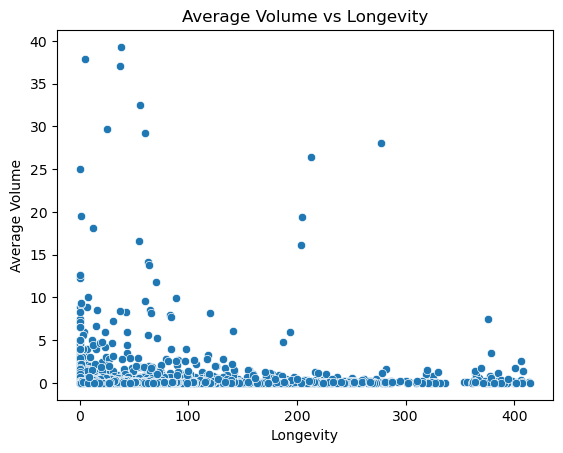

In [26]:
sns.scatterplot(x='longevity', y='Average_Volume', data=dataset)
plt.title('Average Volume vs Longevity')
plt.xlabel('Longevity')
plt.ylabel('Average Volume')
plt.show()


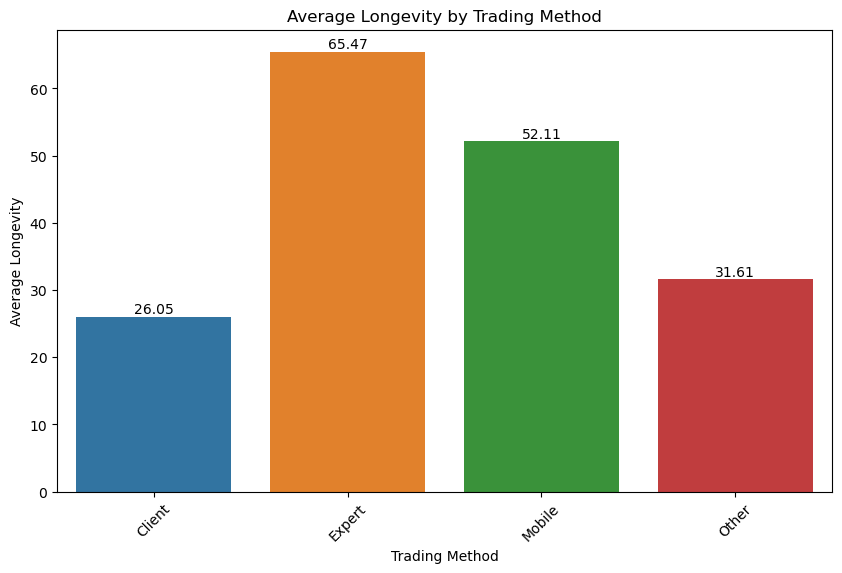

In [27]:
# Calculate average longevity for each trading method
average_longevity_by_method = dataset.groupby('Trading_Method')['longevity'].mean().reset_index()

# Rename columns
average_longevity_by_method = average_longevity_by_method.rename(columns={'Trading_Method': 'Trading Method', 'longevity': 'Average Longevity'})

# Plot average longevity by trading method
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Trading Method', y='Average Longevity', data=average_longevity_by_method)
plt.title('Average Longevity by Trading Method')
plt.xlabel('Trading Method')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels on each column
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


## 2.2 Longevity vs average volume

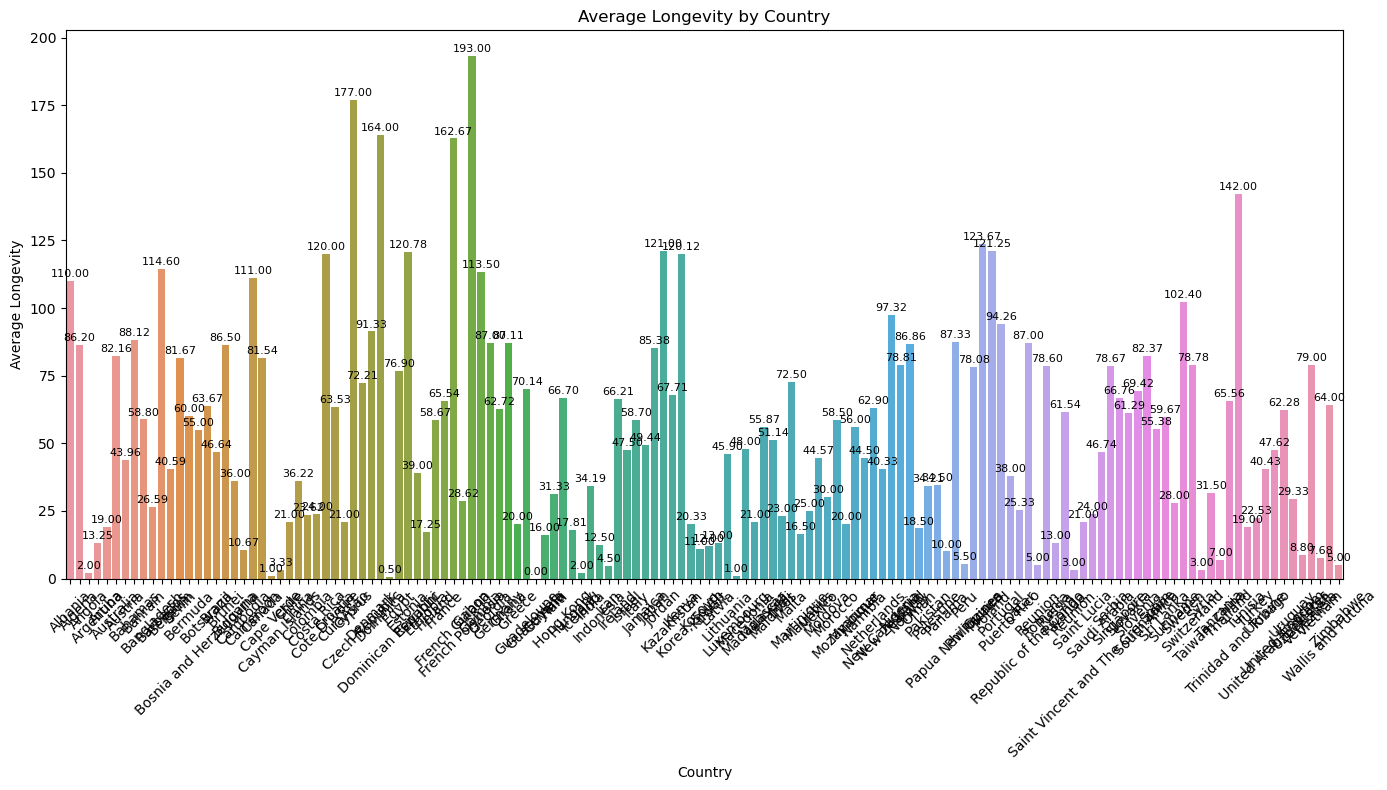

In [28]:
# Calculate average longevity for each country
average_longevity_by_country = dataset.groupby('country')['longevity'].mean().reset_index()

# Rename columns
average_longevity_by_country = average_longevity_by_country.rename(columns={'country': 'Country', 'longevity': 'Average Longevity'})

# Plot average longevity by country
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Country', y='Average Longevity', data=average_longevity_by_country)
plt.title('Average Longevity by Country')
plt.xlabel('Country')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels on each column
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


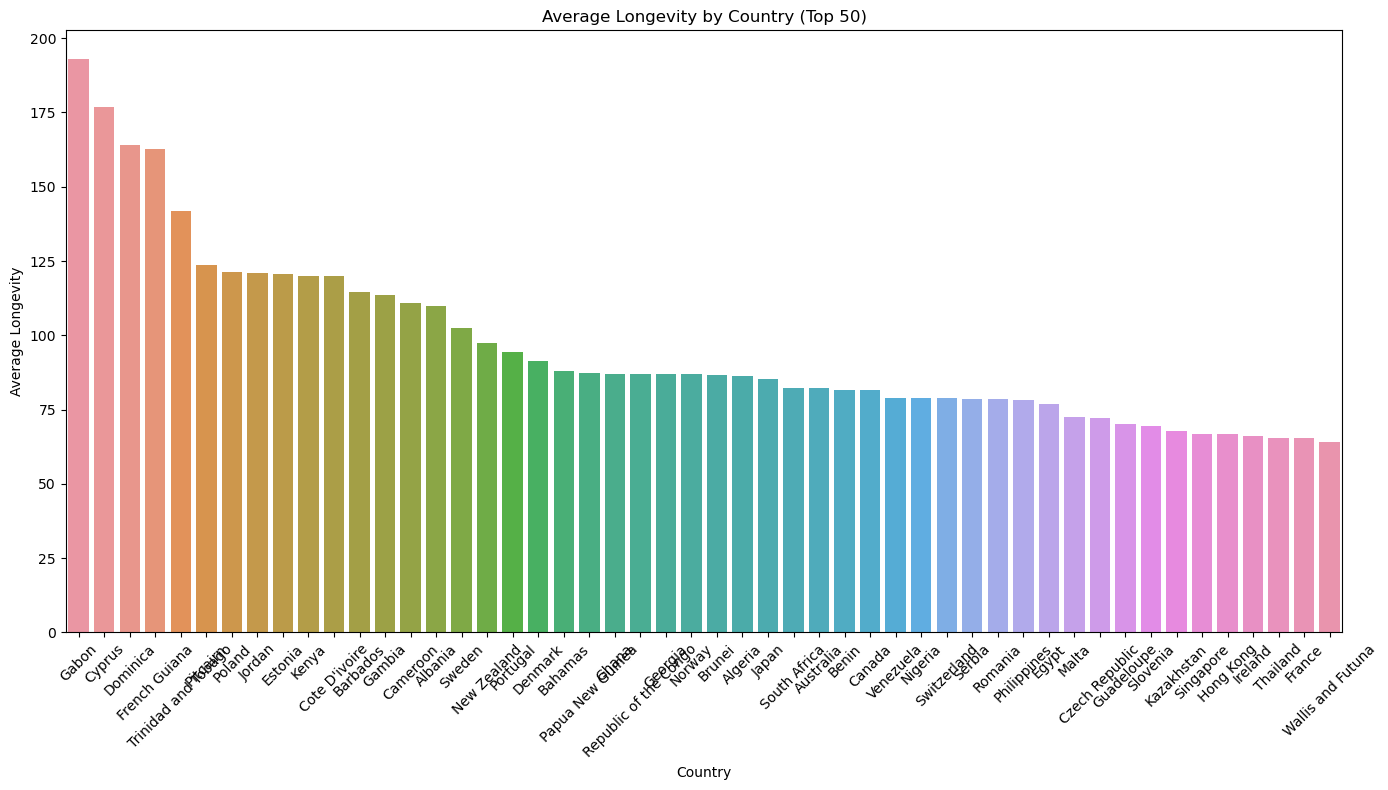

In [29]:
# Calculate average longevity for each country
average_longevity_by_country = dataset.groupby('country')['longevity'].mean().reset_index()

# Sort by longevity and select top 50 countries
top_50_countries = average_longevity_by_country.sort_values(by='longevity', ascending=False).head(50)

# Plot average longevity by country
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='longevity', data=top_50_countries)
plt.title('Average Longevity by Country (Top 50)')
plt.xlabel('Country')
plt.ylabel('Average Longevity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 2.3 Longevity vs profit

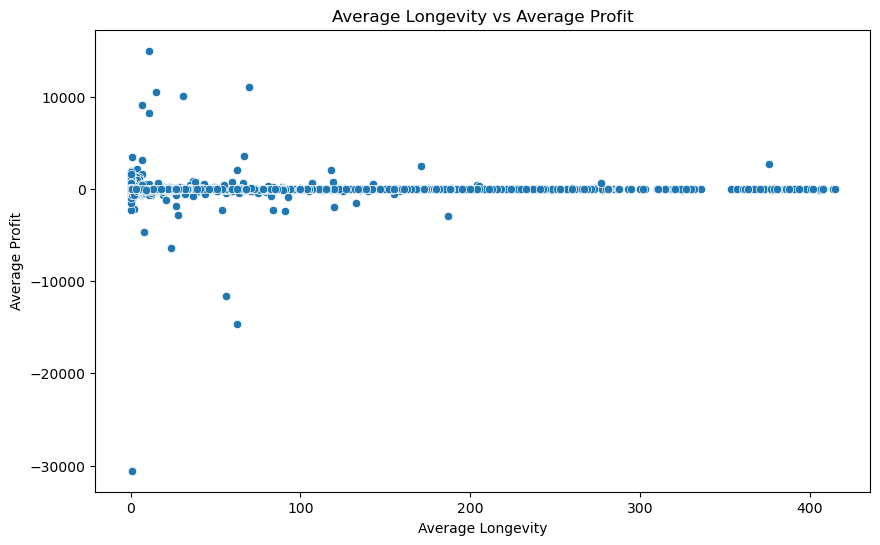

In [30]:
# Plot average longevity vs average profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=dataset)
plt.title('Average Longevity vs Average Profit')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

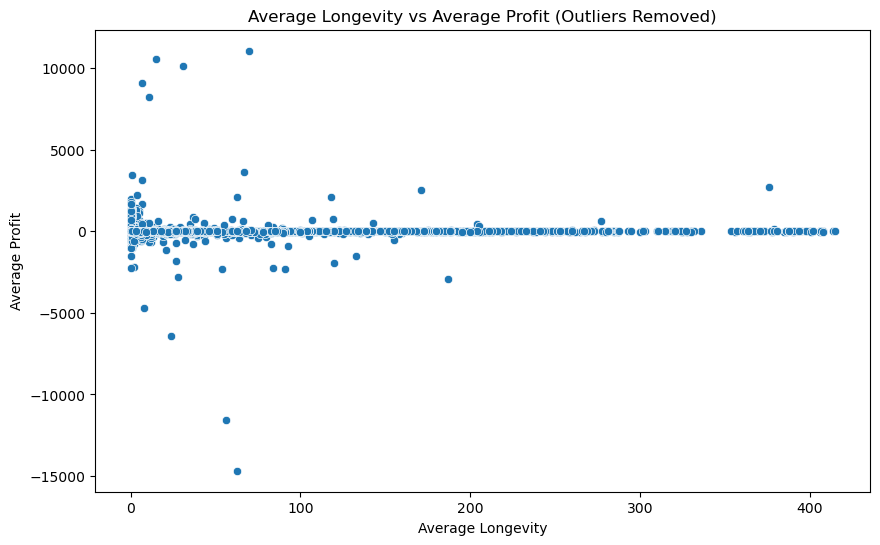

In [31]:
# Find the maximum and minimum profit values
max_profit = dataset['Average_Profit'].max()
min_profit = dataset['Average_Profit'].min()

# Filter the dataset to exclude rows with maximum and minimum profit values
filtered_dataset = dataset[(dataset['Average_Profit'] < max_profit) & (dataset['Average_Profit'] > min_profit)]

# Plot average longevity vs average profit for the filtered dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=filtered_dataset)
plt.title('Average Longevity vs Average Profit (Outliers Removed)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

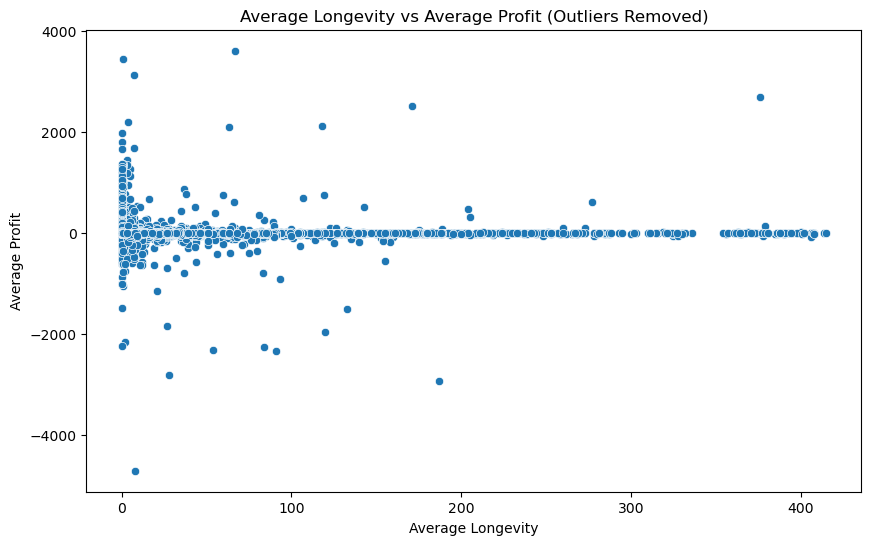

In [32]:
# Filter the dataset to exclude rows with profit above 5000 or below -5000
fivek_filtered_dataset = dataset[(dataset['Average_Profit'] <= 5000) & (dataset['Average_Profit'] >= -5000)]

# Plot average longevity vs average profit for the filtered dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=fivek_filtered_dataset)
plt.title('Average Longevity vs Average Profit (Outliers Removed)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

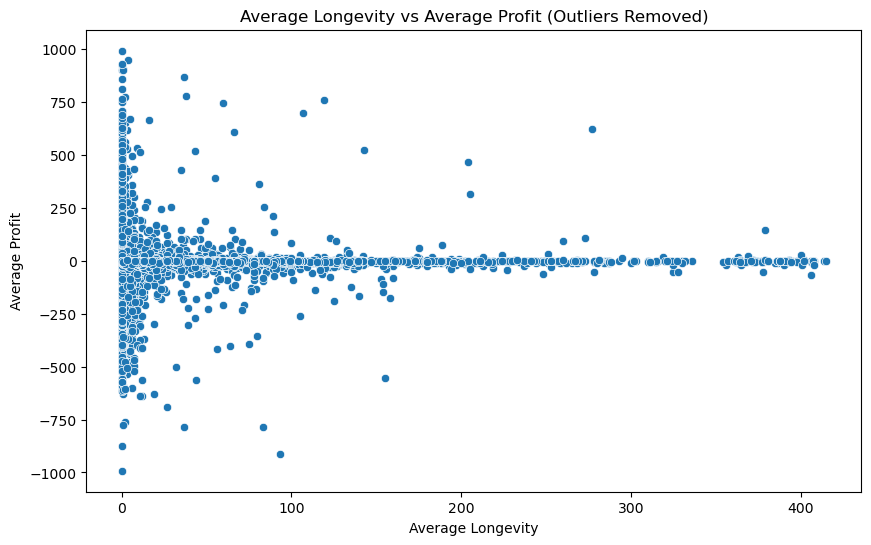

In [33]:
# Filter the dataset to exclude rows with profit above 1000 or below -1000
filtered_dataset = dataset[(dataset['Average_Profit'] <= 1000) & (dataset['Average_Profit'] >= -1000)]

# Plot average longevity vs average profit for the filtered dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Profit', data=filtered_dataset)
plt.title('Average Longevity vs Average Profit (Outliers Removed)')
plt.xlabel('Average Longevity')
plt.ylabel('Average Profit')
plt.show()

## 2.4 Longevity vs average volume in USD

In [35]:
# # Plot average longevity vs Average_Column_USD
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='longevity', y='Average_Volume_USD', data=dataset)
# plt.title('Average Longevity vs Average Column USD')
# plt.xlabel('Average Longevity')
# plt.ylabel('Average Column USD')
# plt.show()

## 2.5 Longevity vs average commission

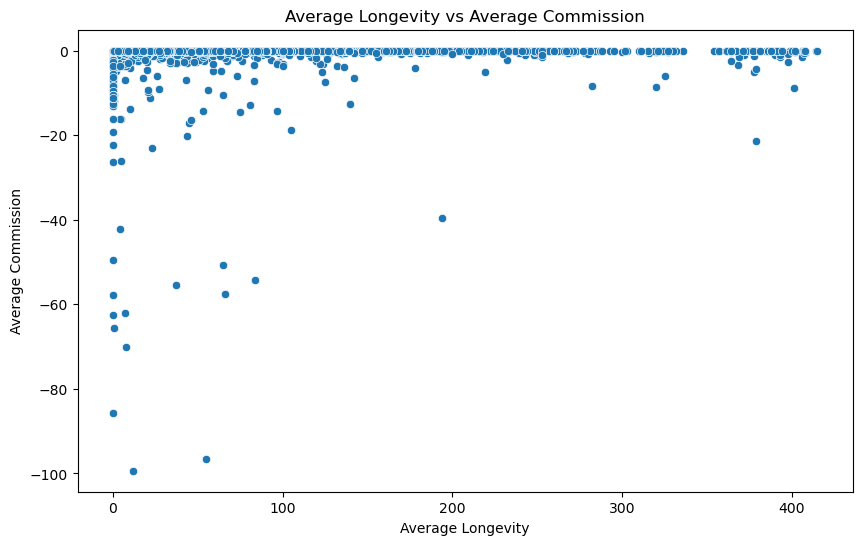

In [37]:
# Plot average commission vs average longevity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Commission', data=dataset)
plt.title('Average Longevity vs Average Commission')
plt.xlabel('Average Longevity')
plt.ylabel('Average Commission')
plt.show()


## 2.6 Longevity vs average swap

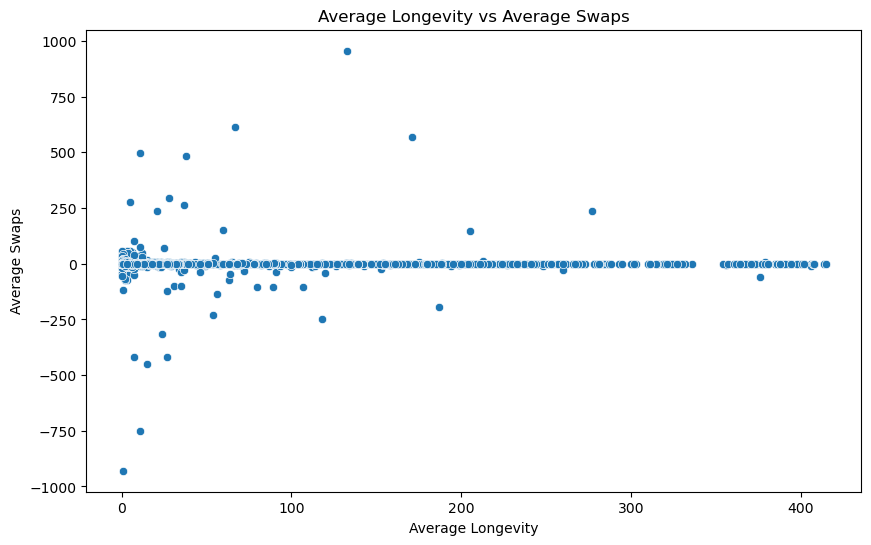

In [38]:
# Plot average swaps vs average longevity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longevity', y='Average_Swaps', data=dataset)
plt.title('Average Longevity vs Average Swaps')
plt.xlabel('Average Longevity')
plt.ylabel('Average Swaps')
plt.show()

# 3 Primary analysis on merge dataset

## 3.1 Dataset_trades_USD_active

### 3.1.0 EDA on dataset_trades_USD_active

In [195]:
dataset_trades_USD_active = dataset_trades_USD_active.reset_index()
dataset_trades_USD_active.head()

,index,login,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,Profit_Loss_Variability,Average_Trade_Duration,TP/SL Hit Ratio,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,Trading_Method,active,longevity,longevity_bin,symbol,cmd,volume,open_price,close_price,tp,sl,commission,swaps,profit,Open_Datetime,Close_Datetime,Trade_Duration,Reason,type
0,0,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,XAUUSD,1,2.90,1979.96,1978.76,1975.0,0.0,0.0,0.0,346.850388,2023-07-19 10:16:46,2023-07-19 10:50:34,0 days 00:33:48,Expert,Metal
1,1,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,NAS100,1,1.37,15804.30,15802.80,0.0,0.0,0.0,0.0,20.568414,2023-07-18 20:24:03,2023-07-18 20:24:51,0 days 00:00:48,Expert,Index
2,2,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,XAUUSD,1,2.90,1975.24,1973.83,1970.0,0.0,0.0,0.0,408.755973,2023-07-19 08:18:24,2023-07-19 09:44:04,0 days 01:25:40,Expert,Metal
3,3,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,XAUUSD,0,2.91,1961.81,1962.70,1967.0,0.0,0.0,0.0,258.623820,2023-07-21 11:57:56,2023-07-21 12:05:18,0 days 00:07:22,Expert,Metal
4,4,524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,XAUUSD,0,4.16,1960.84,1963.18,1968.0,1961.4,0.0,0.0,973.507240,2023-07-25 13:44:56,2023-07-25 15:02:04,0 days 01:17:08,Expert,Metal


### 3.1.1 sl_percentage

In [218]:
sl_dataset_trades_USD_active = dataset_trades_USD_active[['login','sl']]
sl_dataset_trades_USD_active

,login,sl
0,524978,0.00
1,524978,0.00
2,524978,0.00
3,524978,0.00
4,524978,1961.40
...,...,...
1388823,1000054838,0.00
1388824,1000054838,0.00
1388825,1000054838,2025.95
1388826,1000054838,0.00


In [224]:
# Step 1: Count the number of sl per login where sl is not equal to 0
sl_dataset_trades_USD_active['number_of_sl'] = sl_dataset_trades_USD_active.groupby('login')['sl'].transform(lambda x: (x != 0).sum())
sl_dataset_trades_USD_active

# # Step 2: Count the total row per login
sl_dataset_trades_USD_active['total_traded'] = sl_dataset_trades_USD_active.groupby('login').transform('count')['sl']
sl_dataset_trades_USD_active

# # Step 3: Calculate the sl_percentage per login
sl_dataset_trades_USD_active['sl_percentage'] = (sl_dataset_trades_USD_active['number_of_sl'] / sl_dataset_trades_USD_active['total_traded']) * 100
sl_dataset_trades_USD_active

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/1607988452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_dataset_trades_USD_active['number_of_sl'] = sl_dataset_trades_USD_active.groupby('login')['sl'].transform(lambda x: (x != 0).sum())
/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/1607988452.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_dataset_trades_USD_active['total_traded'] = sl_dataset_trades_USD_active.groupby('login').transform('count')['sl']
/va

,login,sl,number_of_sl,total_traded,sl_percentage
0,524978,0.00,248,1392,17.816092
1,524978,0.00,248,1392,17.816092
2,524978,0.00,248,1392,17.816092
3,524978,0.00,248,1392,17.816092
4,524978,1961.40,248,1392,17.816092
...,...,...,...,...,...
1388823,1000054838,0.00,2397,4125,58.109091
1388824,1000054838,0.00,2397,4125,58.109091
1388825,1000054838,2025.95,2397,4125,58.109091
1388826,1000054838,0.00,2397,4125,58.109091


In [244]:
# unique_logins = sl_dataset_trades_USD_active[['login', 'sl_percentage']].drop_duplicates()
unique_logins = sl_dataset_trades_USD_active[['login', 'sl_percentage']].drop_duplicates()
unique_logins

,login,sl_percentage
0,524978,17.816092
1392,524979,62.762078
3586,760487,1.449275
3655,804664,0.000000
3740,804687,100.000000
...,...,...
1382422,88944953,1.851852
1382476,88944971,49.321267
1382918,88945034,39.665971
1383397,88945038,19.754977


In [239]:
# asl_merged_df = pd.merge(unique_logins, dataset_trades_USD_active[['login', 'longevity']], on='login', how='left')
sl_merged_df = pd.merge(unique_logins[['login','sl_percentage']], dataset_trades_USD_active[['login', 'longevity']], on='login', how='left').drop_duplicates()
sl_merged_df

,login,sl_percentage,longevity
0,524978,17.816092,142
1392,524979,62.762078,107
3586,760487,1.449275,13
3655,804664,0.000000,9
3740,804687,100.000000,372
...,...,...,...
1382422,88944953,1.851852,381
1382476,88944971,49.321267,100
1382918,88945034,39.665971,46
1383397,88945038,19.754977,253


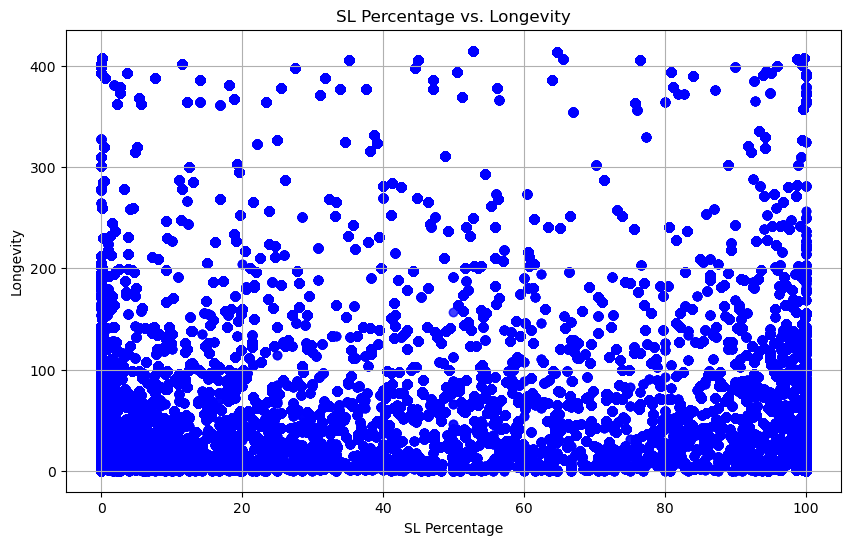

In [240]:
# Extracting data
sl_percentage = merged_df['sl_percentage']
longevity = merged_df['longevity']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(sl_percentage, longevity, color='blue', alpha=0.5)
plt.title('SL Percentage vs Longevity')
plt.xlabel('SL Percentage')
plt.ylabel('Longevity')
plt.grid(True)
plt.show()

In [242]:
# Calculate correlation matrix
correlation_matrix = merged_df[['sl_percentage', 'longevity']].corr()
correlation_matrix

,sl_percentage,longevity
sl_percentage,1.000000,-0.190163
longevity,-0.190163,1.000000


### 3.1.2 sl_gap

In [247]:
sl_gap_dataset_trades_USD_active = dataset_trades_USD_active[['login', 'cmd', 'open_price', 'sl','longevity']]
sl_gap_dataset_trades_USD_active

,login,cmd,open_price,sl,longevity
0,524978,1,1979.96,0.00,142
1,524978,1,15804.30,0.00,142
2,524978,1,1975.24,0.00,142
3,524978,0,1961.81,0.00,142
4,524978,0,1960.84,1961.40,142
...,...,...,...,...,...
1388823,1000054838,1,2032.05,0.00,85
1388824,1000054838,0,1969.12,0.00,85
1388825,1000054838,1,2026.11,2025.95,85
1388826,1000054838,1,2022.39,0.00,85


In [248]:
sl_gap_dataset_trades_USD_active_filtered = sl_gap_dataset_trades_USD_active[sl_gap_dataset_trades_USD_active['sl'] != 0]
sl_gap_dataset_trades_USD_active_filtered

,login,cmd,open_price,sl,longevity
4,524978,0,1960.84,1961.40,142
6,524978,1,1925.66,1926.85,142
7,524978,1,1923.90,1921.48,142
9,524978,0,1935.10,1932.63,142
10,524978,1,1929.20,1932.00,142
...,...,...,...,...,...
1388803,1000054838,0,2037.16,2039.57,85
1388806,1000054838,1,2074.10,2072.80,85
1388809,1000054838,0,2079.64,2080.50,85
1388822,1000054838,1,2031.40,2031.20,85


In [249]:
# Function to calculate sl_range based on cmd
def calculate_sl_range(row):
    if row['cmd'] == 0:
        return row['open_price'] / row['sl'] - 1
    elif row['cmd'] == 1:
        return row['sl'] / row['open_price'] - 1

# Apply the function to create the sl_range column
sl_gap_dataset_trades_USD_active_filtered['sl_range'] = sl_gap_dataset_trades_USD_active_filtered.apply(calculate_sl_range, axis=1)
sl_gap_dataset_trades_USD_active_filtered


/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/2903678146.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sl_gap_dataset_trades_USD_active_filtered['sl_range'] = sl_gap_dataset_trades_USD_active_filtered.apply(calculate_sl_range, axis=1)


,login,cmd,open_price,sl,longevity,sl_range
4,524978,0,1960.84,1961.40,142,-0.000286
6,524978,1,1925.66,1926.85,142,0.000618
7,524978,1,1923.90,1921.48,142,-0.001258
9,524978,0,1935.10,1932.63,142,0.001278
10,524978,1,1929.20,1932.00,142,0.001451
...,...,...,...,...,...,...
1388803,1000054838,0,2037.16,2039.57,85,-0.001182
1388806,1000054838,1,2074.10,2072.80,85,-0.000627
1388809,1000054838,0,2079.64,2080.50,85,-0.000413
1388822,1000054838,1,2031.40,2031.20,85,-0.000098


In [250]:
# Group by 'login' and calculate the mean of 'sl_range' and get the first 'longevity' value
sl_range_mean = sl_gap_dataset_trades_USD_active_filtered.groupby('login').agg({'sl_range': 'mean', 'longevity': 'first'})

# Reset index to make 'login' a column again
sl_range_mean.reset_index(inplace=True)

# Display the DataFrame with mean sl_range and longevity for each login
sl_range_mean


,login,sl_range,longevity
0,524978,0.010560,142
1,524979,0.012637,107
2,760487,0.001049,13
3,804687,0.000163,372
4,804688,0.000658,196
...,...,...,...
4041,88944953,0.000757,381
4042,88944971,0.089705,100
4043,88945034,0.001237,46
4044,88945038,0.008759,253


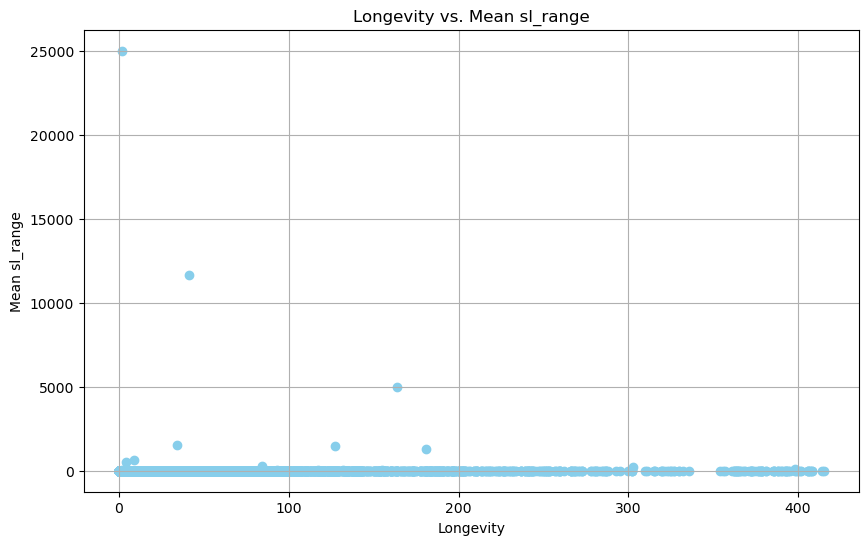

In [252]:
# Plot longevity and sl_range
plt.figure(figsize=(10, 6))
plt.scatter(sl_range_mean['longevity'], sl_range_mean['sl_range'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Mean sl_range')
plt.title('Longevity vs. Mean sl_range')
plt.grid(True)
plt.show()


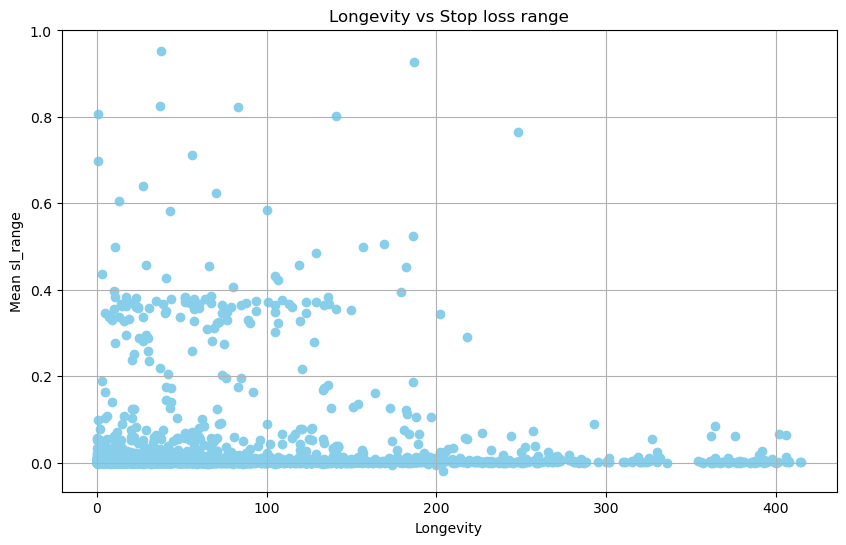

In [256]:
# Filter out rows where sl_range is greater than 1
filtered_data = sl_range_mean[sl_range_mean['sl_range'] <= 1]

# Plot longevity and sl_range for sl_range <= 1
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['longevity'], filtered_data['sl_range'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Mean sl_range')
plt.title('Longevity vs Stop loss range')
plt.grid(True)
plt.show()


### 3.1.3 Daily trading frequency

In [266]:
open_close_dataset_trades_USD_active = dataset_trades_USD_active[['login', 'open_price', 'tp','longevity']]
# open_close_dataset_trades_USD_active

In [267]:
# Create a new column "day_trade" based on the condition
open_close_dataset_trades_USD_active['day_trade'] = (open_close_dataset_trades_USD_active['tp'] != 0).astype(int)
# open_close_dataset_trades_USD_active

/var/folders/s5/yjzt_0752f3_4zc69pnv4j700000gn/T/ipykernel_58122/4128084960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_close_dataset_trades_USD_active['day_trade'] = (open_close_dataset_trades_USD_active['tp'] != 0).astype(int)


In [268]:
login_counts = open_close_dataset_trades_USD_active.groupby('login').size().reset_index(name='count')
# login_counts

In [269]:
# Group by 'login' and count the number of rows, keeping the 'longevity' column
login_counts = open_close_dataset_trades_USD_active.groupby('login').agg(count=('longevity', 'count'), longevity=('longevity', 'first')).reset_index()
# login_counts

In [270]:
# Create a new column 'daily_trading_frequency'
login_counts['daily_trading_frequency'] = login_counts['count'] / login_counts['longevity']
login_counts


,login,count,longevity,daily_trading_frequency
0,524978,1392,142,9.802817
1,524979,2194,107,20.504673
2,760487,69,13,5.307692
3,804664,85,9,9.444444
4,804687,484,372,1.301075
...,...,...,...,...
5719,88944953,54,381,0.141732
5720,88944971,442,100,4.420000
5721,88945034,479,46,10.413043
5722,88945038,1306,253,5.162055


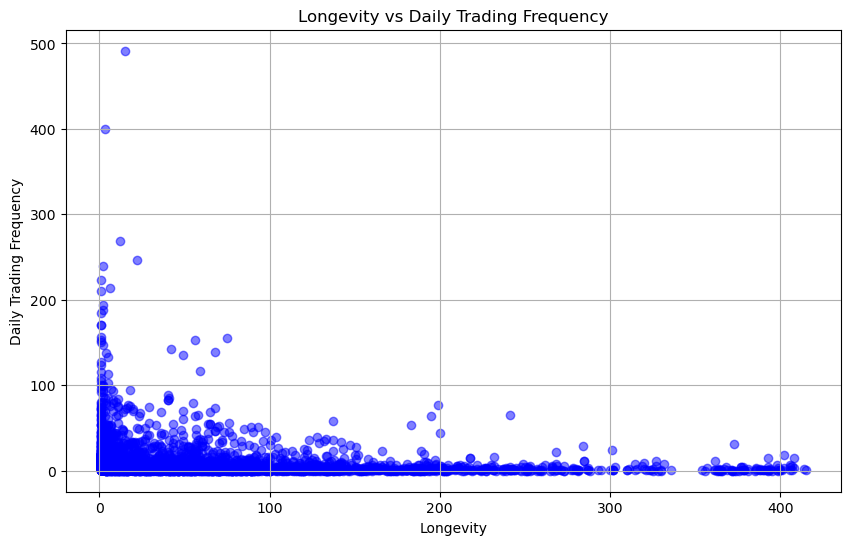

In [271]:
# Plot longevity against daily_trading_frequency
plt.figure(figsize=(10, 6))
plt.scatter(login_counts['longevity'], login_counts['daily_trading_frequency'], color='blue', alpha=0.5)
plt.xlabel('Longevity')
plt.ylabel('Daily Trading Frequency')
plt.title('Longevity vs Daily Trading Frequency')
plt.grid(True)
plt.show()


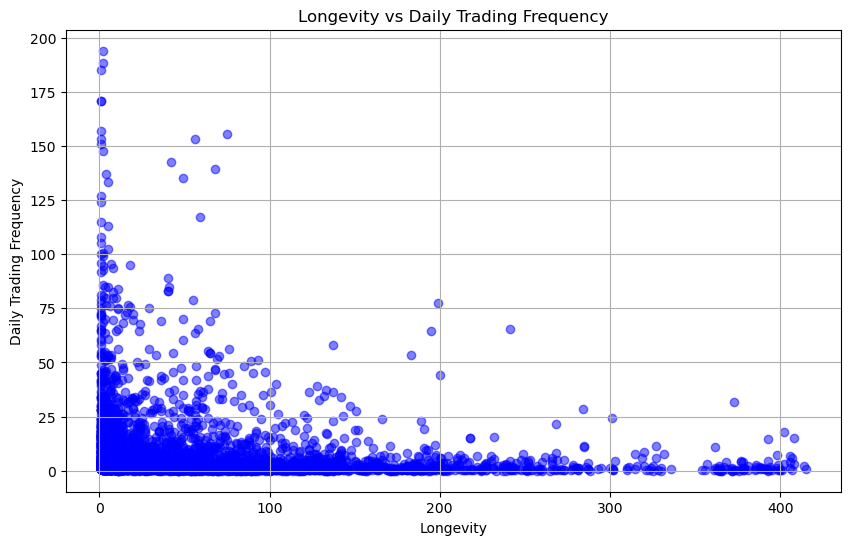

In [274]:
# Filter the DataFrame to include only rows where longevity is less than 200
filtered_data = login_counts[login_counts['daily_trading_frequency'] < 200]

# Plot longevity against daily_trading_frequency
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['longevity'], filtered_data['daily_trading_frequency'], color='blue', alpha=0.5)
plt.xlabel('Longevity')
plt.ylabel('Daily Trading Frequency')
plt.title('Longevity vs Daily Trading Frequency')
plt.grid(True)
plt.show()


### 3.1.4 Percentage of day_trading

In [275]:
open_close_dataset_trades_USD_active

,login,open_price,tp,longevity,day_trade
0,524978,1979.96,1975.0,142,1
1,524978,15804.30,0.0,142,0
2,524978,1975.24,1970.0,142,1
3,524978,1961.81,1967.0,142,1
4,524978,1960.84,1968.0,142,1
...,...,...,...,...,...
1388823,1000054838,2032.05,0.0,85,0
1388824,1000054838,1969.12,0.0,85,0
1388825,1000054838,2026.11,0.0,85,0
1388826,1000054838,2022.39,0.0,85,0


In [277]:
login_day_trade_sum = open_close_dataset_trades_USD_active.groupby('login')['day_trade'].sum().reset_index()
login_day_trade_sum

,login,day_trade
0,524978,554
1,524979,311
2,760487,65
3,804664,0
4,804687,60
...,...,...
5719,88944953,2
5720,88944971,187
5721,88945034,244
5722,88945038,1272


In [281]:
# Merge to get the count
daytrade_and_tradecount = pd.merge(login_counts, login_day_trade_sum, on='login', how='left')
daytrade_and_tradecount


,login,count,longevity,daily_trading_frequency,day_trade
0,524978,1392,142,9.802817,554
1,524979,2194,107,20.504673,311
2,760487,69,13,5.307692,65
3,804664,85,9,9.444444,0
4,804687,484,372,1.301075,60
...,...,...,...,...,...
5719,88944953,54,381,0.141732,2
5720,88944971,442,100,4.420000,187
5721,88945034,479,46,10.413043,244
5722,88945038,1306,253,5.162055,1272


In [283]:
daytrade_and_tradecount['percentage_of_daytrading'] = daytrade_and_tradecount['day_trade'] / daytrade_and_tradecount['count'] * 100
daytrade_and_tradecount

,login,count,longevity,daily_trading_frequency,day_trade,percentage_of_daytrading
0,524978,1392,142,9.802817,554,39.798851
1,524979,2194,107,20.504673,311,14.175023
2,760487,69,13,5.307692,65,94.202899
3,804664,85,9,9.444444,0,0.000000
4,804687,484,372,1.301075,60,12.396694
...,...,...,...,...,...,...
5719,88944953,54,381,0.141732,2,3.703704
5720,88944971,442,100,4.420000,187,42.307692
5721,88945034,479,46,10.413043,244,50.939457
5722,88945038,1306,253,5.162055,1272,97.396631


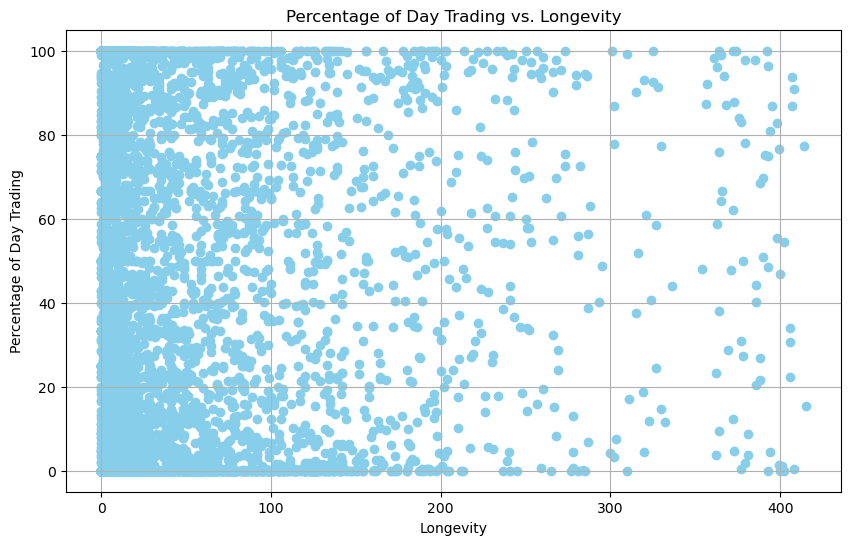

In [287]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(daytrade_and_tradecount['longevity'], daytrade_and_tradecount['percentage_of_daytrading'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Percentage of Day Trading')
plt.title('Percentage of Day Trading vs Longevity')
plt.grid(True)
plt.show()

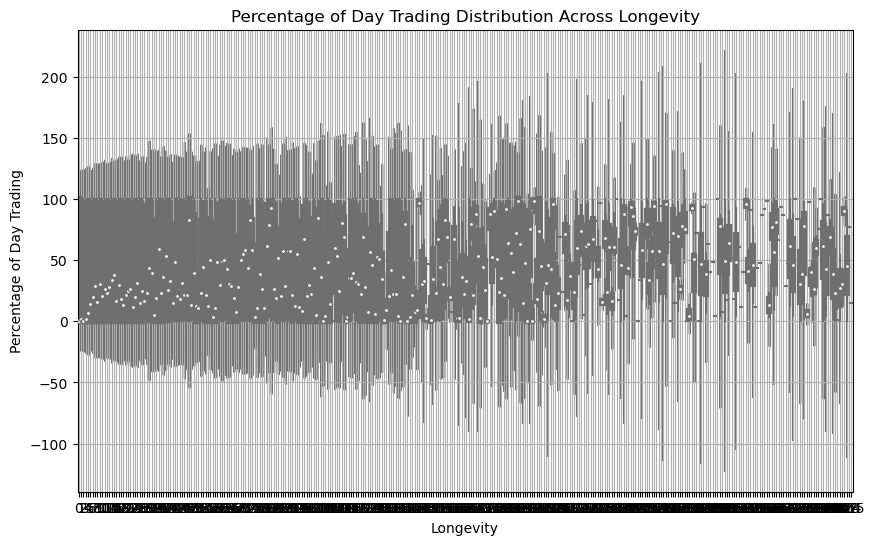

In [289]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=daytrade_and_tradecount['longevity'], y=daytrade_and_tradecount['percentage_of_daytrading'], color='skyblue')
plt.xlabel('Longevity')
plt.ylabel('Percentage of Day Trading')
plt.title('Percentage of Day Trading Distribution Across Longevity')
plt.grid(True)
plt.show()


### 3.1.

## 3.2 Dataset_report_USD_active

### 3.2.0 EDA on dataset_trades_USD_active


In [292]:
dataset_report_USD_active

,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,Profit_Loss_Variability,Average_Trade_Duration,TP/SL Hit Ratio,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,Trading_Method,active,longevity,longevity_bin,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
login,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375000,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,2023-06-07,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375000,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,2023-06-08,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375000,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,2023-06-09,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375000,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,2023-06-10,0.000,0.000,0.000,0.0,0.0,0.0,0.0
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375000,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2,2023-06-11,107.565,107.565,107.565,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,48.027839,3697.880242,0.043292,-1.329755,0.000000,-0.026504,-2.182613,0.000000,0.0,Expert,False,85,1,2024-02-27,0.000,0.740,0.740,0.0,0.0,0.0,0.0
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,48.027839,3697.880242,0.043292,-1.329755,0.000000,-0.026504,-2.182613,0.000000,0.0,Expert,False,85,1,2024-02-29,0.000,0.740,0.740,0.0,0.0,0.0,0.0
1000054838,Saudi Arabia,USD,48.529412,0.565333,0.105981,4.312099e+04,-48.437138,2,15,0.684606,48.027839,3697.880242,0.043292,-1.329755,0.000000,-0.026504,-2.182613,0.000000,0.0,Expert,False,85,1,2024-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2.

### 3.2.

### 3.2.

### 3.2.

# 4 One year survivor

## 4.1 General EDA on 365

In [113]:
# Filter records where longevity is greater than 365 days
long_survivors = dataset[dataset['longevity'] > 365]

# Print the records of people who survived more than 365 days
print("People who survived more than 365 days:")
long_survivors.head()

People who survived more than 365 days:


,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,Profit_Loss_Variability,Average_Trade_Duration,TP/SL Hit Ratio,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,Trading_Method,active,longevity,longevity_bin
login,,,,,,,,,,,,,,,,,,,,,,,
804687,Australia,AUD,1.301075,0.512397,0.019773,5.271755e+05,-45.416080,17,3,0.311983,3.559165,22939.518595,0.002283,55.989328,-0.101129,-0.009749,-0.210692,2.947076,0.0,Mobile,False,372,5
804867,United Kingdom,GBP,1.362069,0.443038,0.072170,1.954211e+04,-357.222874,8,7,0.634720,85.603497,363006.473779,1.347826,0.190853,0.000000,-0.242798,-6.876003,8.199495,0.0,Expert,True,406,5
804893,France,USD,14.936275,0.482934,0.077248,1.669919e+04,15.343162,1,17,0.710535,32.197704,7019.101575,546.428571,3.643614,-0.540737,-0.007246,0.080876,12.357820,0.0,Expert,True,408,5
804936,France,EUR,4.208995,0.438089,0.703325,1.413410e+08,-35.485078,28,17,0.467630,100.809722,2639.808297,0.133721,2.207832,-1.339072,-0.058651,-7.071991,34.783438,0.0,Client,True,378,5
804954,Portugal,EUR,1.205128,0.317021,0.185617,2.670649e+08,-54.703874,20,13,0.421277,240.405883,17607.746809,0.141509,0.907284,-0.999965,-0.223473,-21.289392,28.984180,0.0,Client,True,390,5


In [93]:
# Analyze commonalities among the long survivors
common_countries = long_survivors['country'].value_counts()
common_trading_methods = long_survivors['Trading_Method'].value_counts()
average_profit_stats = long_survivors['Average_Profit'].describe()
average_volume_stats = long_survivors['Average_Volume'].describe()

In [94]:
# Print commonalities
print("\nCommon Countries:")
print(common_countries)
print("\nCommon Trading Methods:")
print(common_trading_methods)
print("\nAverage Profit Statistics:")
print(average_profit_stats)
print("\nAverage Volume Statistics:")
print(average_volume_stats)


Common Countries:
France            9
Canada            7
New Zealand       6
United Kingdom    4
Australia         3
Philippines       3
Nigeria           3
Singapore         3
Switzerland       2
Portugal          2
Poland            2
South Africa      2
Sweden            2
Spain             1
Slovenia          1
Saudi Arabia      1
Ireland           1
Morocco           1
Cyprus            1
Kenya             1
Barbados          1
Hong Kong         1
Romania           1
Name: country, dtype: int64

Common Trading Methods:
Mobile    23
Expert    19
Client    15
Other      1
Name: Trading_Method, dtype: int64

Average Profit Statistics:
count      58.000000
mean       45.552955
std       354.445138
min       -56.712063
25%        -3.158269
50%        -0.572320
75%         0.239240
max      2694.472000
Name: Average_Profit, dtype: float64

Average Volume Statistics:
count    58.000000
mean      0.467157
std       1.139637
min       0.010685
25%       0.025623
50%       0.083813
75%   

In [95]:
print("\nCommon Trading Methods:")
print(common_trading_methods)


Common Trading Methods:
Mobile    23
Expert    19
Client    15
Other      1
Name: Trading_Method, dtype: int64


In [96]:
print("\nAverage Profit Statistics:")
print(average_profit_stats)


Average Profit Statistics:
count      58.000000
mean       45.552955
std       354.445138
min       -56.712063
25%        -3.158269
50%        -0.572320
75%         0.239240
max      2694.472000
Name: Average_Profit, dtype: float64


In [97]:
print("\nAverage Volume Statistics:")
print(average_volume_stats)


Average Volume Statistics:
count    58.000000
mean      0.467157
std       1.139637
min       0.010685
25%       0.025623
50%       0.083813
75%       0.329677
max       7.479000
Name: Average_Volume, dtype: float64


dataset


## 4.2 Correlation Matrix of 1-year survivor on output.csv

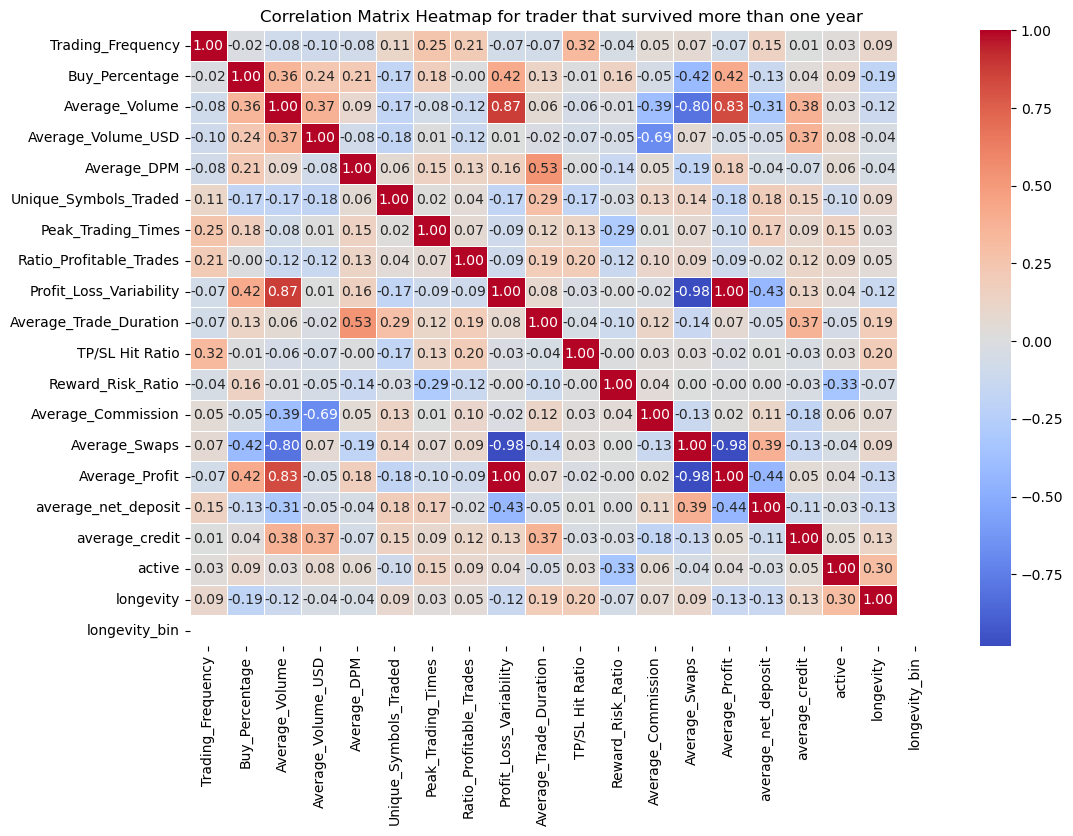

In [107]:
# Create a correlation matrix
long_survivors_correlation_matrix = long_survivors.corr()
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap for trader that survived more than one year")
plt.show()


## 4.3 login_report_1survivor
login_trades + 1 year survivor


### 4.3.0 Merge report_USD with the 1 year survivor

In [120]:
long_survivors_id = long_survivors.index.to_frame().drop(columns = ['login'])
# long_survivors_id.head()

In [149]:
login_report_1survivor = pd.merge(long_survivors_id, login_trades, how='inner', on='login').reset_index()
login_report_1survivor

,login,country,account_currency,Reg_Datetime,ticket,symbol,cmd,volume,open_price,close_price,tp,sl,commission,swaps,profit,Open_Datetime,Close_Datetime,Trade_Duration,Reason,type
0,804687,Australia,AUD,2023-01-10 10:26:00,59570268,AUDUSD,1,0.03,0.66466,0.66521,0.0,0.6652,-0.213072,0.0,-1.651308,2023-05-17 04:44:59,2023-05-17 04:51:11,0 days 00:06:12,Mobile,Forex
1,804687,Australia,AUD,2023-01-10 10:26:00,61381179,AUDUSD,0,0.01,0.67684,0.67597,0.0,0.6760,-0.067910,0.0,-0.876039,2023-07-25 13:07:47,2023-07-25 14:27:13,0 days 01:19:26,Mobile,Forex
2,804687,Australia,AUD,2023-01-10 10:26:00,68241663,XAGUSD,0,0.01,22.92900,22.84700,0.0,22.8500,0.000000,0.0,-4.096038,2024-01-26 04:34:19,2024-01-26 09:16:15,0 days 04:41:56,Mobile,Metal
3,804687,Australia,AUD,2023-01-10 10:26:00,68003875,XAGUSD,0,0.01,22.54500,22.58500,0.0,22.5850,0.000000,0.0,1.984019,2024-01-22 02:41:15,2024-01-22 03:54:06,0 days 01:12:51,Mobile,Metal
4,804687,Australia,AUD,2023-01-10 10:26:00,64613596,AUDUSD,1,0.01,0.63140,0.63250,0.0,0.6325,-0.069239,0.0,-1.095243,2023-10-13 09:40:17,2023-10-13 10:27:05,0 days 00:46:48,Mobile,Forex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66057,88944953,Canada,CAD,2023-01-12 02:52:40,56842674,EURUSD,0,0.03,1.08376,1.08380,0.0,0.0000,0.000000,0.0,0.119644,2023-01-20 01:18:19,2023-01-20 02:14:17,0 days 00:55:58,Mobile,Forex
66058,88944953,Canada,CAD,2023-01-12 02:52:40,56845459,AUDUSD,0,0.09,0.69259,0.69264,0.0,0.0000,0.000000,0.0,0.456143,2023-01-20 05:36:38,2023-01-20 05:43:08,0 days 00:06:30,Mobile,Forex
66059,88944953,Canada,CAD,2023-01-12 02:52:40,56868833,EURUSD,1,0.04,1.08646,1.08631,0.0,0.0000,0.000000,0.0,0.598502,2023-01-23 00:18:38,2023-01-23 01:04:24,0 days 00:45:46,Mobile,Forex
66060,88944953,Canada,CAD,2023-01-12 02:52:40,56839798,AUDUSD,1,0.03,0.69193,0.69189,0.0,0.0000,0.000000,0.0,0.126343,2023-01-19 22:17:55,2023-01-19 22:30:32,0 days 00:12:37,Mobile,Forex


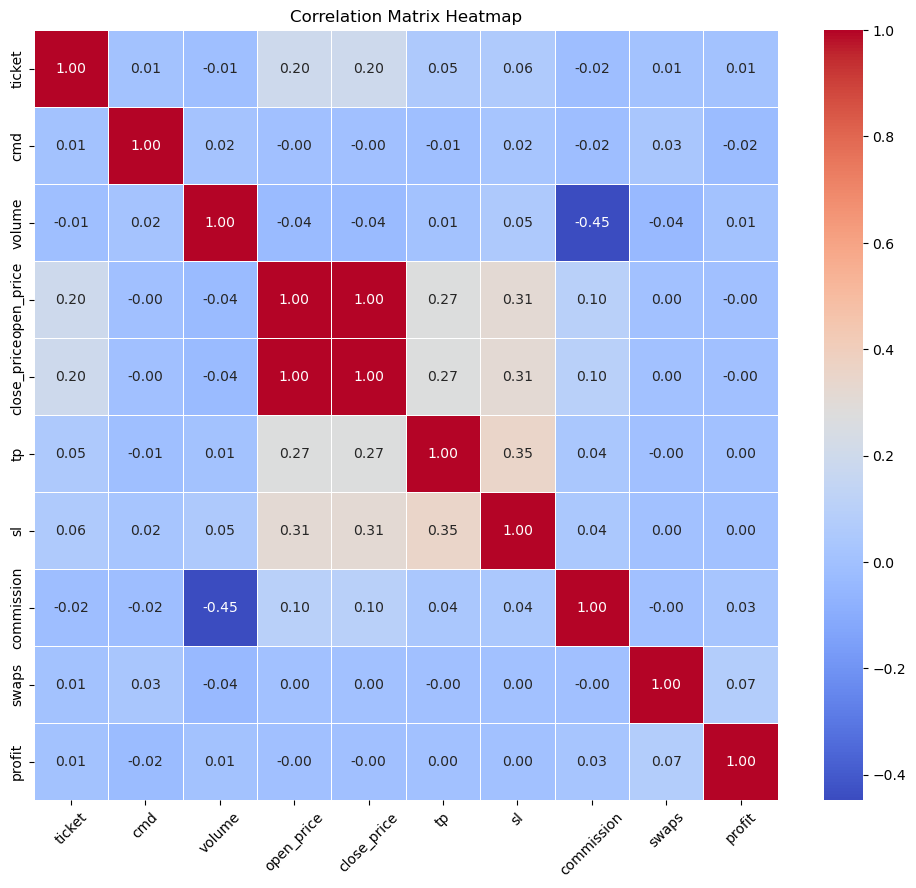

In [122]:
# Create the correlation matrix
login_report_1survivor_correlation_matrix = login_report_1survivor.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.xticks(rotation=45)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 4.3.1 Stop Loss gap

In [124]:
# Calculate stop_loss_gap based on the conditions
login_report_1survivor['stop_loss_gap'] = np.where(login_report_1survivor['cmd'] == 0,
                                                   (login_report_1survivor['open_price'] - login_report_1survivor['sl']) / login_report_1survivor['open_price'],
                                                   (login_report_1survivor['sl'] - login_report_1survivor['open_price']) / login_report_1survivor['open_price'])

# Display the DataFrame with the new stop_loss_gap variable
login_report_1survivor[['cmd', 'open_price', 'sl', 'stop_loss_gap']]


,cmd,open_price,sl,stop_loss_gap
login,,,,
804687,1,0.66466,0.6652,0.000812
804687,0,0.67684,0.6760,0.001241
804687,0,22.92900,22.8500,0.003445
804687,0,22.54500,22.5850,-0.001774
804687,1,0.63140,0.6325,0.001742
...,...,...,...,...
88944953,0,1.08376,0.0000,1.000000
88944953,0,0.69259,0.0000,1.000000
88944953,1,1.08646,0.0000,-1.000000


Average Stop Loss Gap of 1-year survivor

In [144]:
# Calculate average stop_loss_gap based on login
average_stop_loss_gap = login_report_1survivor.groupby('login')['stop_loss_gap'].mean().reset_index().sort_values('stop_loss_gap')
average_stop_loss_gap.head()

,login,stop_loss_gap
57,88944953,-0.240727
38,806391,-0.187541
24,805613,-0.142652
32,806047,-0.142562
1,804867,-0.138973


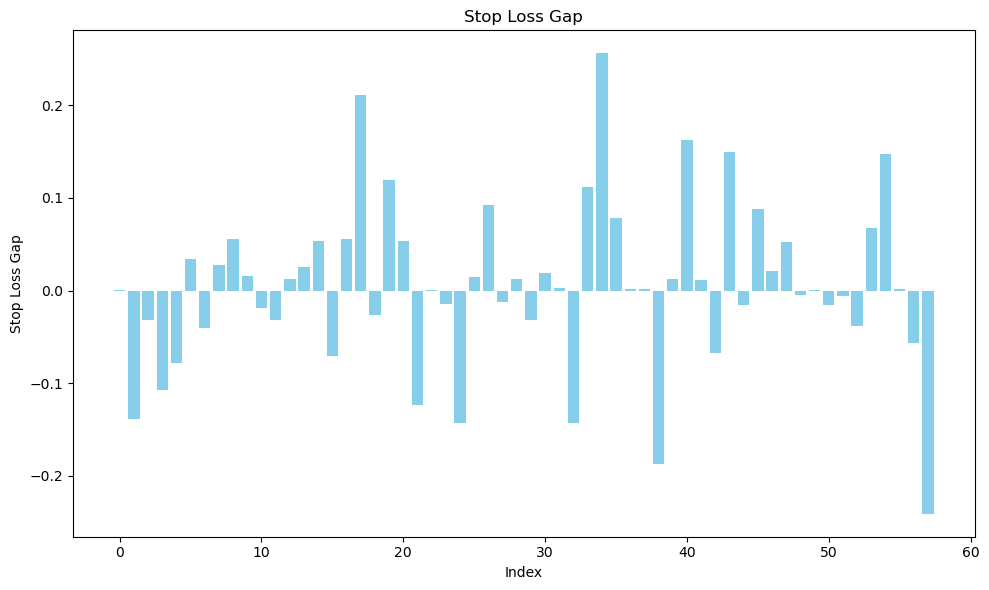

In [147]:
import matplotlib.pyplot as plt

# Plot stop_loss_gap
plt.figure(figsize=(10, 6))
plt.bar(average_stop_loss_gap.index, average_stop_loss_gap['stop_loss_gap'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Stop Loss Gap')
plt.title('Stop Loss Gap')
plt.tight_layout()
plt.show()



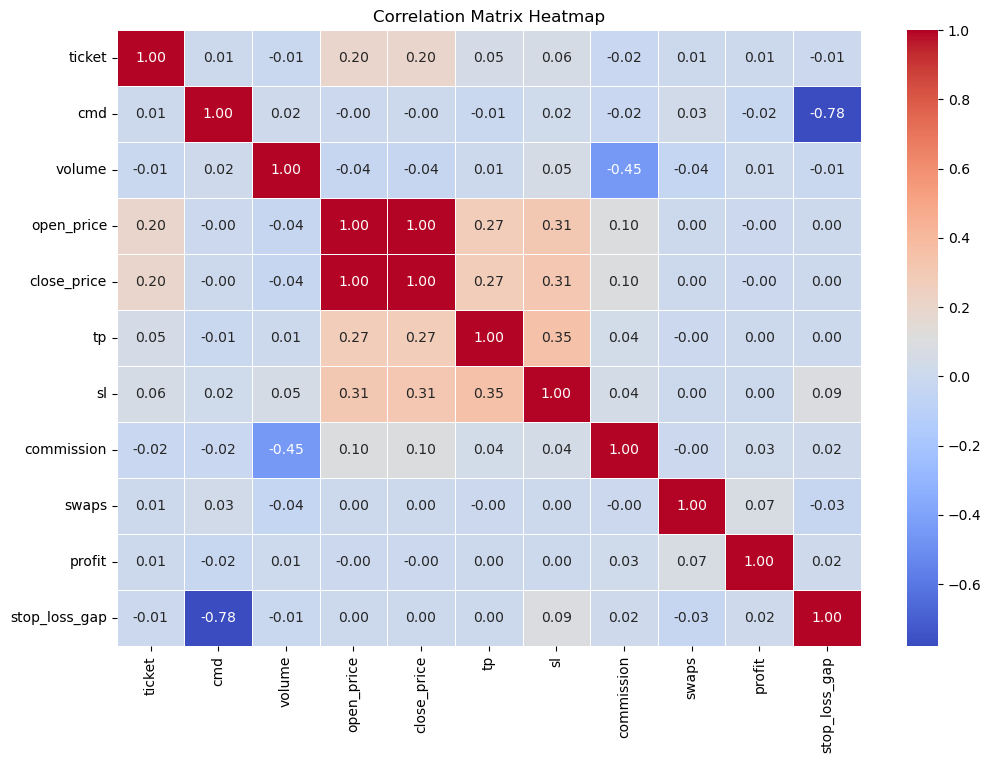

In [127]:
login_report_1survivor_correlation_matrix = login_report_1survivor.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(login_report_1survivor_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### 4.3.2 Stop loss percentage compare to trade


In [151]:
login_report_1survivor.head()

,login,country,account_currency,Reg_Datetime,ticket,symbol,cmd,volume,open_price,close_price,tp,sl,commission,swaps,profit,Open_Datetime,Close_Datetime,Trade_Duration,Reason,type
0,804687,Australia,AUD,2023-01-10 10:26:00,59570268,AUDUSD,1,0.03,0.66466,0.66521,0.0,0.6652,-0.213072,0.0,-1.651308,2023-05-17 04:44:59,2023-05-17 04:51:11,0 days 00:06:12,Mobile,Forex
1,804687,Australia,AUD,2023-01-10 10:26:00,61381179,AUDUSD,0,0.01,0.67684,0.67597,0.0,0.6760,-0.067910,0.0,-0.876039,2023-07-25 13:07:47,2023-07-25 14:27:13,0 days 01:19:26,Mobile,Forex
2,804687,Australia,AUD,2023-01-10 10:26:00,68241663,XAGUSD,0,0.01,22.92900,22.84700,0.0,22.8500,0.000000,0.0,-4.096038,2024-01-26 04:34:19,2024-01-26 09:16:15,0 days 04:41:56,Mobile,Metal
3,804687,Australia,AUD,2023-01-10 10:26:00,68003875,XAGUSD,0,0.01,22.54500,22.58500,0.0,22.5850,0.000000,0.0,1.984019,2024-01-22 02:41:15,2024-01-22 03:54:06,0 days 01:12:51,Mobile,Metal
4,804687,Australia,AUD,2023-01-10 10:26:00,64613596,AUDUSD,1,0.01,0.63140,0.63250,0.0,0.6325,-0.069239,0.0,-1.095243,2023-10-13 09:40:17,2023-10-13 10:27:05,0 days 00:46:48,Mobile,Forex


In [193]:
import matplotlib.pyplot as plt

# Calculate the percentage of time where sl != 0 for each login
sl_percentage = (login_report_1survivor.groupby('login')['sl'].apply(lambda x: (x != 0).sum()) / login_report_1survivor.groupby('login')['sl'].count()) * 100
sl_percentage = sl_percentage.to_frame()

sl_percentage_df = sl_percentage.rename(columns={'sl': 'sl_percentage'})
sl_percentage_df = sl_percentage_df.sort_values(by = 'sl_percentage', ascending= False)
# sl_percentage_df
sl_percentage_df.mean()



sl_percentage    53.16857
dtype: float64

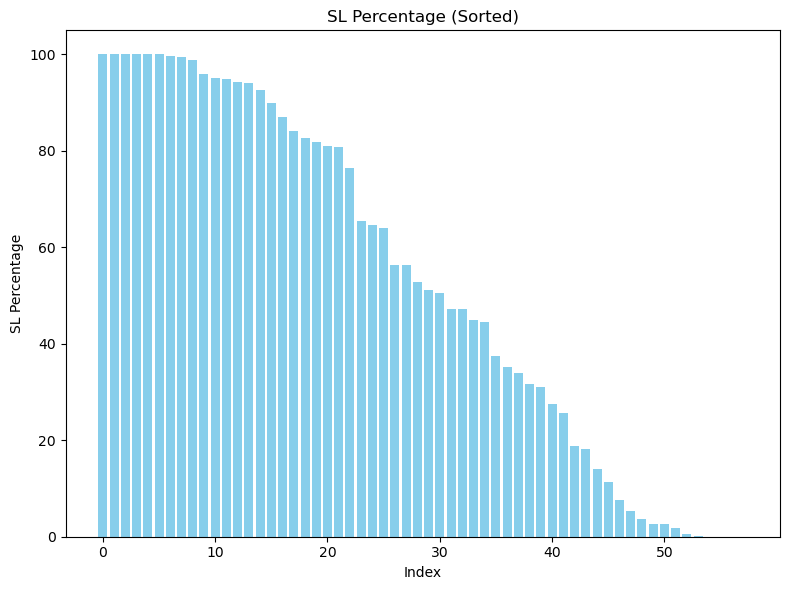

In [190]:
# Plot the sorted data
plt.figure(figsize=(8, 6))
plt.bar(range(len(sl_percentage_df)), sl_percentage_df['sl_percentage'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('SL Percentage')
plt.title('SL Percentage (Sorted)')
plt.xticks(range(0, len(sl_percentage_df), 10), range(0, len(sl_percentage_df), 10))
plt.tight_layout()
plt.show()

# Random Stuff

In [108]:
dataset

,country,account_currency,Trading_Frequency,Buy_Percentage,Average_Volume,Average_Volume_USD,Average_DPM,Unique_Symbols_Traded,Peak_Trading_Times,Ratio_Profitable_Trades,Profit_Loss_Variability,Average_Trade_Duration,TP/SL Hit Ratio,Reward_Risk_Ratio,Average_Commission,Average_Swaps,Average_Profit,average_net_deposit,average_credit,Trading_Method,active,longevity,longevity_bin
login,,,,,,,,,,,,,,,,,,,,,,,
524978,Austria,EUR,9.802817,0.474856,1.230632,4.044965e+08,-3.415139,30,17,0.762931,316.119097,36404.811782,3.375000,0.086763,-6.935588,-1.481077,25.668214,118.543572,0.0,Expert,False,142,2
524979,France,USD,20.504673,0.496354,0.013943,6.724644e+03,-264.410462,4,17,0.718323,11.676818,57056.876937,0.087081,-0.549598,0.000000,-0.111285,-0.837867,7.316443,0.0,Mobile,False,107,2
760487,Singapore,SGD,5.307692,0.159420,0.012609,2.783882e+03,-3403.656636,1,17,0.463768,12.396847,46984.231884,0.000000,0.000000,0.000000,0.002172,-10.232797,2.648954,0.0,Expert,False,13,0
804664,Malaysia,USD,9.444444,0.635294,0.018706,5.490400e+03,17.604088,6,3,0.517647,6.861240,8397.694118,0.000000,0.000000,0.000000,-0.023176,-0.524588,0.332571,0.0,Mobile,False,9,0
804687,Australia,AUD,1.301075,0.512397,0.019773,5.271755e+05,-45.416080,17,3,0.311983,3.559165,22939.518595,0.002283,55.989328,-0.101129,-0.009749,-0.210692,2.947076,0.0,Mobile,False,372,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88944953,Canada,CAD,0.141732,0.370370,0.041667,1.621176e+07,-24.464597,8,8,0.796296,8.643649,6284.925926,0.000000,0.000000,0.000000,-0.005931,-0.134167,0.178571,0.0,Mobile,True,381,5
88944971,Malaysia,USD,4.420000,0.461538,1.389367,1.249156e+09,-298.590702,14,23,0.658371,428.451471,73300.337104,6.823529,0.195671,0.000000,-5.085113,-51.760588,1.773400,0.0,Expert,False,100,2
88945034,Singapore,USD,10.413043,0.400835,0.043278,1.522641e+07,-70.501778,25,15,0.626305,15.980216,6259.916493,2.760870,0.623201,-0.256347,-0.000271,-1.519937,0.000000,0.0,Expert,False,46,1
